In [17]:
#%matplotlib notebook
import os
import sys
sys.path.append("numpy_path")
import numpy as np
import struct
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import keras.callbacks as cb
from keras.callbacks import EarlyStopping, ModelCheckpoint
from math import cos, sin, pi
from statistics import mean
import os.path
import math
shape_size = 48

# define loss  history
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

#plot losses
def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()

def feature_scaling(X):
    X = X.T
    for i in range(7):
        mean = X[i].mean()
        std = X[i].std()
        X[i] = [(x - mean)/std for x in X[i]]
    return X.T

# input dimension
in_dim = 6
out_dim = 200
def init_model():
    model = Sequential()
    model.add(Dense(20, input_dim=in_dim))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(500))
    model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Dense(500))
    model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Dense(200))
    model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Dense(200))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
#     model.add(Dense(70))
#     model.add(Dropout(0.2))
#     model.add(Activation('relu'))
#     model.add(Dense(100))
#     model.add(Activation('relu'))
    model.add(Dense(out_dim))
    model.add(Activation('sigmoid'))
    # use mean squared error to measure the looses
    model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr = 0.001),
              metrics=['accuracy'])
    return model

In [18]:
data_size = 0
dummy1 = [0]*200
dummy2 = [0]*6
SP = np.array(np.reshape(dummy1, (1, 200)))
SH = np.array(np.reshape(dummy2, (1, 6)))
for i in range(2, 42):
    path = 'meep_code/data/DATA'+str(i)
    if not os.path.exists(path):
        #miss.append(i)
        print('Missing batch:' + str(i))
        continue
        
    files = next(os.walk(path))[2] #dir is your directory path as string]
    num_data = len(files)
    data_size += num_data
    skip = []
    
    coordinates = np.genfromtxt('meep_code/data/DATA'+str(i)+'_sh.txt')
    xc, yc = coordinates[:, 0], coordinates[:, 1]
    xc = np.reshape(xc, (num_data, shape_size))
    yc = np.reshape(yc, (num_data, shape_size))
    
    for j in range(num_data):
        tmp = np.genfromtxt(path+'/'+'DATA'+str(i)+'_sp'+str(j)+'.txt')
        valid = True
        for q in range(200): 
            
            if math.isnan(float(tmp[q])):
                print('Batch '+str(i)+'\tsample '+str(j)+' has NAN value')
                valid = False
                break
            if tmp[q] > 3:
                print('Batch '+str(i)+'\tsample '+str(j)+' has extreme value')
                valid = False
                break
        if not valid:
            #skip.append(j)
            continue
        SP = np.concatenate((SP, np.reshape(tmp, (1, 200))))
        tmp = []
        for q in range(6):
            tmp.append(math.sqrt(xc[j][q]**2 + yc[j][q]**2))
        SH = np.concatenate((SH, np.reshape(np.array(tmp), (1, 6))))
        #print(SP.shape)
    #print(files)
#     coordinates = np.genfromtxt('meep_code/data/DATA'+str(i)+'_sh.txt')
#     xc, yc = coordinates[:, 0], coordinates[:, 1]
#     xc = np.reshape(xc, (num_data, shape_size))
#     yc = np.reshape(yc, (num_data, shape_size))
#     for j in range(num_data):
#         if j in skip:
#             continue
#         tmp = []
#         for q in range(6):
#             tmp.append(math.sqrt(xc[j][q]**2 + yc[j][q]**2))
#         SH = np.concatenate((SH, np.reshape(np.array(tmp), (1, 6))))
    print('Batch '+str(i)+' has \t'+str(num_data)) 
#     freq = np.genfromtxt('meep_code/data/freq.txt')   
#     for j in range(num_data):
#         print(j)
#         plt.ylim(0, 1.1)
#         plt.plot(freq, SP[data_size - num_data + j + 1])
#         plt.show()
#         plt.axis('equal')
#         plt.ylim(-0.5, 0.5)
#         plt.xlim(-0.5, 0.5)
#         plt.plot(xc[j], yc[j])
#         plt.fill(xc[j], yc[j])
#         plt.show()

Batch 2 has 	7
Batch 3 has 	6
Batch 4 has 	17
Batch 5 has 	5
Batch 6 has 	14
Batch 7 has 	14
Batch 8 has 	40
Batch 9 has 	5
Batch 10 has 	14
Batch 11 has 	14
Batch 12 has 	40
Batch 13 has 	13
Batch 14 has 	37
Batch 15 has 	37
Missing batch:16
Batch 17 has 	5
Batch 18 has 	14
Batch 19 has 	14
Batch 20 has 	40
Batch 21 has 	13
Batch 22 has 	37
Batch 23 has 	37
Batch 24 has 	106
Batch 25 has 	13
Batch 26 has 	37
Batch 27 has 	37
Batch 28 has 	106
Batch 29 has 	35
Batch 30 has 	100
Batch 31 has 	100
Batch 32 has 	287
Batch 33 has 	5
Batch 34 has 	14
Batch 35 has 	14
Batch 36 has 	40
Batch 37 has 	13
Batch 38 has 	37
Batch 39 has 	37
Batch 40 has 	106
Batch 41 has 	13


In [19]:
print('Total # of data: ' + str(len(SP)))
SP_F, SH_F = np.reshape(SP[1], (1, 200)),np.reshape(SH[1], (1, 6))
for i in range(2, len(SP)):
    peak = 0
    for j in range(1, 200):
        if SP[i][j - 1] >= 0.6 >=SP[i][j]:
            peak += 1
            p_pos = [((j-1)/2+200,SP[i][j - 1]), (j/2+200, SP[i][j])]
    if peak < 5:
        SP_F = np.concatenate((SP_F, np.reshape(SP[i], (1, 200))))
        SH_F = np.concatenate((SH_F, np.reshape(SH[i], (1, 6))))

Total # of data: 1524


In [20]:
DATA = np.append(SP_F, SH_F, axis = 1)
np.random.shuffle(DATA)

Y = DATA[:, :200]
X = DATA[:,200:]

train_size = int(len(DATA) * 0.8)

train_X = X[0:train_size, :]
train_Y = Y[0:train_size, :]
test_X = X[train_size:, :]
test_Y = Y[train_size:, :]

In [26]:
model = init_model()
#history = LossHistory()
# when training, using minibatch seems to be pretty good
history = model.fit(train_X, train_Y, epochs=1000, batch_size=20,
                callbacks=[history],
                validation_data=(test_X, test_Y), verbose=2)
# score = model.evaluate(test_X, test_Y, batch_size=10)
# print(score)
# plot_losses(history.losses)


# callbacks = [EarlyStopping(monitor='val_loss', patience=100),
#              ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

# model = init_model_2()
# history = model.fit(train_x, train_y_processed, 
#                     epochs=1000,
#                     callbacks=callbacks, 
#                     batch_size=400, 
#                     validation_data=(test_x, test_y_processed), verbose = 2)
# train_score = model.evaluate(train_x, train_y_processed, batch_size=400)
# test_score = model.evaluate(test_x, test_y_processed, batch_size=100)
# print(train_score)
# print(test_score)
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')



Train on 855 samples, validate on 214 samples
Epoch 1/1000
 - 2s - loss: 0.1096 - acc: 0.0035 - val_loss: 0.0782 - val_acc: 0.0140
Epoch 2/1000
 - 0s - loss: 0.0750 - acc: 0.0070 - val_loss: 0.0778 - val_acc: 0.0047
Epoch 3/1000
 - 0s - loss: 0.0728 - acc: 0.0047 - val_loss: 0.0650 - val_acc: 0.0140
Epoch 4/1000
 - 0s - loss: 0.0600 - acc: 0.0023 - val_loss: 0.0541 - val_acc: 0.0047
Epoch 5/1000
 - 0s - loss: 0.0525 - acc: 0.0058 - val_loss: 0.0509 - val_acc: 0.0093
Epoch 6/1000
 - 0s - loss: 0.0505 - acc: 0.0047 - val_loss: 0.0505 - val_acc: 0.0140
Epoch 7/1000
 - 0s - loss: 0.0500 - acc: 0.0082 - val_loss: 0.0504 - val_acc: 0.0047
Epoch 8/1000
 - 0s - loss: 0.0495 - acc: 0.0012 - val_loss: 0.0503 - val_acc: 0.0093
Epoch 9/1000
 - 0s - loss: 0.0495 - acc: 0.0105 - val_loss: 0.0496 - val_acc: 0.0047
Epoch 10/1000
 - 0s - loss: 0.0487 - acc: 0.0070 - val_loss: 0.0491 - val_acc: 0.0093
Epoch 11/1000
 - 0s - loss: 0.0485 - acc: 0.0070 - val_loss: 0.0495 - val_acc: 0.0047
Epoch 12/1000
 - 

Epoch 96/1000
 - 0s - loss: 0.0328 - acc: 0.0140 - val_loss: 0.0344 - val_acc: 0.0140
Epoch 97/1000
 - 0s - loss: 0.0331 - acc: 0.0199 - val_loss: 0.0328 - val_acc: 0.0187
Epoch 98/1000
 - 0s - loss: 0.0331 - acc: 0.0117 - val_loss: 0.0359 - val_acc: 0.0187
Epoch 99/1000
 - 0s - loss: 0.0325 - acc: 0.0211 - val_loss: 0.0363 - val_acc: 0.0234
Epoch 100/1000
 - 0s - loss: 0.0328 - acc: 0.0117 - val_loss: 0.0383 - val_acc: 0.0140
Epoch 101/1000
 - 0s - loss: 0.0326 - acc: 0.0082 - val_loss: 0.0353 - val_acc: 0.0093
Epoch 102/1000
 - 0s - loss: 0.0326 - acc: 0.0164 - val_loss: 0.0331 - val_acc: 0.0093
Epoch 103/1000
 - 0s - loss: 0.0316 - acc: 0.0129 - val_loss: 0.0334 - val_acc: 0.0047
Epoch 104/1000
 - 0s - loss: 0.0329 - acc: 0.0140 - val_loss: 0.0398 - val_acc: 0.0140
Epoch 105/1000
 - 0s - loss: 0.0328 - acc: 0.0140 - val_loss: 0.0366 - val_acc: 0.0187
Epoch 106/1000
 - 0s - loss: 0.0321 - acc: 0.0117 - val_loss: 0.0340 - val_acc: 0.0093
Epoch 107/1000
 - 0s - loss: 0.0312 - acc: 0.01

 - 0s - loss: 0.0288 - acc: 0.0199 - val_loss: 0.0358 - val_acc: 0.0000e+00
Epoch 191/1000
 - 0s - loss: 0.0282 - acc: 0.0246 - val_loss: 0.0324 - val_acc: 0.0047
Epoch 192/1000
 - 0s - loss: 0.0290 - acc: 0.0187 - val_loss: 0.0376 - val_acc: 0.0047
Epoch 193/1000
 - 0s - loss: 0.0281 - acc: 0.0257 - val_loss: 0.0346 - val_acc: 0.0047
Epoch 194/1000
 - 0s - loss: 0.0291 - acc: 0.0152 - val_loss: 0.0316 - val_acc: 0.0047
Epoch 195/1000
 - 0s - loss: 0.0288 - acc: 0.0129 - val_loss: 0.0365 - val_acc: 0.0047
Epoch 196/1000
 - 0s - loss: 0.0291 - acc: 0.0152 - val_loss: 0.0390 - val_acc: 0.0047
Epoch 197/1000
 - 0s - loss: 0.0284 - acc: 0.0199 - val_loss: 0.0351 - val_acc: 0.0047
Epoch 198/1000
 - 0s - loss: 0.0287 - acc: 0.0152 - val_loss: 0.0375 - val_acc: 0.0047
Epoch 199/1000
 - 0s - loss: 0.0290 - acc: 0.0117 - val_loss: 0.0372 - val_acc: 0.0047
Epoch 200/1000
 - 0s - loss: 0.0284 - acc: 0.0199 - val_loss: 0.0317 - val_acc: 0.0047
Epoch 201/1000
 - 0s - loss: 0.0283 - acc: 0.0164 - va

Epoch 285/1000
 - 0s - loss: 0.0261 - acc: 0.0164 - val_loss: 0.0335 - val_acc: 0.0093
Epoch 286/1000
 - 0s - loss: 0.0265 - acc: 0.0246 - val_loss: 0.0364 - val_acc: 0.0093
Epoch 287/1000
 - 0s - loss: 0.0272 - acc: 0.0222 - val_loss: 0.0352 - val_acc: 0.0140
Epoch 288/1000
 - 0s - loss: 0.0265 - acc: 0.0257 - val_loss: 0.0373 - val_acc: 0.0140
Epoch 289/1000
 - 0s - loss: 0.0257 - acc: 0.0246 - val_loss: 0.0350 - val_acc: 0.0093
Epoch 290/1000
 - 0s - loss: 0.0260 - acc: 0.0234 - val_loss: 0.0377 - val_acc: 0.0140
Epoch 291/1000
 - 0s - loss: 0.0269 - acc: 0.0234 - val_loss: 0.0324 - val_acc: 0.0093
Epoch 292/1000
 - 0s - loss: 0.0265 - acc: 0.0234 - val_loss: 0.0348 - val_acc: 0.0093
Epoch 293/1000
 - 0s - loss: 0.0262 - acc: 0.0257 - val_loss: 0.0338 - val_acc: 0.0187
Epoch 294/1000
 - 0s - loss: 0.0261 - acc: 0.0281 - val_loss: 0.0322 - val_acc: 0.0093
Epoch 295/1000
 - 0s - loss: 0.0256 - acc: 0.0257 - val_loss: 0.0324 - val_acc: 0.0093
Epoch 296/1000
 - 0s - loss: 0.0263 - acc: 

 - 0s - loss: 0.0261 - acc: 0.0234 - val_loss: 0.0323 - val_acc: 0.0187
Epoch 380/1000
 - 0s - loss: 0.0260 - acc: 0.0257 - val_loss: 0.0390 - val_acc: 0.0140
Epoch 381/1000
 - 0s - loss: 0.0248 - acc: 0.0316 - val_loss: 0.0361 - val_acc: 0.0140
Epoch 382/1000
 - 0s - loss: 0.0255 - acc: 0.0234 - val_loss: 0.0402 - val_acc: 0.0140
Epoch 383/1000
 - 0s - loss: 0.0253 - acc: 0.0222 - val_loss: 0.0374 - val_acc: 0.0140
Epoch 384/1000
 - 0s - loss: 0.0255 - acc: 0.0257 - val_loss: 0.0334 - val_acc: 0.0140
Epoch 385/1000
 - 0s - loss: 0.0256 - acc: 0.0281 - val_loss: 0.0349 - val_acc: 0.0140
Epoch 386/1000
 - 0s - loss: 0.0254 - acc: 0.0281 - val_loss: 0.0378 - val_acc: 0.0140
Epoch 387/1000
 - 0s - loss: 0.0251 - acc: 0.0304 - val_loss: 0.0352 - val_acc: 0.0187
Epoch 388/1000
 - 0s - loss: 0.0258 - acc: 0.0292 - val_loss: 0.0357 - val_acc: 0.0280
Epoch 389/1000
 - 0s - loss: 0.0248 - acc: 0.0386 - val_loss: 0.0351 - val_acc: 0.0280
Epoch 390/1000
 - 0s - loss: 0.0252 - acc: 0.0316 - val_lo

Epoch 474/1000
 - 0s - loss: 0.0244 - acc: 0.0339 - val_loss: 0.0374 - val_acc: 0.0374
Epoch 475/1000
 - 0s - loss: 0.0236 - acc: 0.0222 - val_loss: 0.0354 - val_acc: 0.0280
Epoch 476/1000
 - 0s - loss: 0.0238 - acc: 0.0409 - val_loss: 0.0372 - val_acc: 0.0327
Epoch 477/1000
 - 0s - loss: 0.0240 - acc: 0.0363 - val_loss: 0.0345 - val_acc: 0.0280
Epoch 478/1000
 - 0s - loss: 0.0233 - acc: 0.0444 - val_loss: 0.0355 - val_acc: 0.0234
Epoch 479/1000
 - 0s - loss: 0.0238 - acc: 0.0351 - val_loss: 0.0349 - val_acc: 0.0234
Epoch 480/1000
 - 0s - loss: 0.0233 - acc: 0.0480 - val_loss: 0.0379 - val_acc: 0.0374
Epoch 481/1000
 - 0s - loss: 0.0243 - acc: 0.0363 - val_loss: 0.0351 - val_acc: 0.0327
Epoch 482/1000
 - 0s - loss: 0.0236 - acc: 0.0456 - val_loss: 0.0371 - val_acc: 0.0280
Epoch 483/1000
 - 0s - loss: 0.0236 - acc: 0.0304 - val_loss: 0.0368 - val_acc: 0.0234
Epoch 484/1000
 - 0s - loss: 0.0244 - acc: 0.0304 - val_loss: 0.0366 - val_acc: 0.0327
Epoch 485/1000
 - 0s - loss: 0.0239 - acc: 

 - 0s - loss: 0.0235 - acc: 0.0421 - val_loss: 0.0380 - val_acc: 0.0280
Epoch 569/1000
 - 0s - loss: 0.0236 - acc: 0.0386 - val_loss: 0.0357 - val_acc: 0.0234
Epoch 570/1000
 - 0s - loss: 0.0235 - acc: 0.0257 - val_loss: 0.0405 - val_acc: 0.0280
Epoch 571/1000
 - 0s - loss: 0.0237 - acc: 0.0409 - val_loss: 0.0351 - val_acc: 0.0374
Epoch 572/1000
 - 0s - loss: 0.0227 - acc: 0.0421 - val_loss: 0.0354 - val_acc: 0.0280
Epoch 573/1000
 - 0s - loss: 0.0231 - acc: 0.0281 - val_loss: 0.0385 - val_acc: 0.0280
Epoch 574/1000
 - 0s - loss: 0.0241 - acc: 0.0421 - val_loss: 0.0363 - val_acc: 0.0280
Epoch 575/1000
 - 0s - loss: 0.0233 - acc: 0.0374 - val_loss: 0.0368 - val_acc: 0.0327
Epoch 576/1000
 - 0s - loss: 0.0233 - acc: 0.0526 - val_loss: 0.0344 - val_acc: 0.0421
Epoch 577/1000
 - 0s - loss: 0.0238 - acc: 0.0386 - val_loss: 0.0366 - val_acc: 0.0327
Epoch 578/1000
 - 0s - loss: 0.0228 - acc: 0.0433 - val_loss: 0.0378 - val_acc: 0.0327
Epoch 579/1000
 - 0s - loss: 0.0237 - acc: 0.0339 - val_lo

Epoch 663/1000
 - 0s - loss: 0.0220 - acc: 0.0444 - val_loss: 0.0315 - val_acc: 0.0234
Epoch 664/1000
 - 0s - loss: 0.0230 - acc: 0.0351 - val_loss: 0.0370 - val_acc: 0.0140
Epoch 665/1000
 - 0s - loss: 0.0225 - acc: 0.0444 - val_loss: 0.0385 - val_acc: 0.0140
Epoch 666/1000
 - 0s - loss: 0.0232 - acc: 0.0456 - val_loss: 0.0275 - val_acc: 0.0234
Epoch 667/1000
 - 0s - loss: 0.0233 - acc: 0.0351 - val_loss: 0.0379 - val_acc: 0.0280
Epoch 668/1000
 - 0s - loss: 0.0224 - acc: 0.0386 - val_loss: 0.0390 - val_acc: 0.0327
Epoch 669/1000
 - 0s - loss: 0.0226 - acc: 0.0444 - val_loss: 0.0380 - val_acc: 0.0187
Epoch 670/1000
 - 0s - loss: 0.0230 - acc: 0.0374 - val_loss: 0.0390 - val_acc: 0.0140
Epoch 671/1000
 - 0s - loss: 0.0226 - acc: 0.0491 - val_loss: 0.0368 - val_acc: 0.0280
Epoch 672/1000
 - 0s - loss: 0.0229 - acc: 0.0398 - val_loss: 0.0329 - val_acc: 0.0187
Epoch 673/1000
 - 0s - loss: 0.0226 - acc: 0.0550 - val_loss: 0.0351 - val_acc: 0.0234
Epoch 674/1000
 - 0s - loss: 0.0230 - acc: 

 - 0s - loss: 0.0217 - acc: 0.0456 - val_loss: 0.0411 - val_acc: 0.0327
Epoch 758/1000
 - 0s - loss: 0.0222 - acc: 0.0316 - val_loss: 0.0367 - val_acc: 0.0234
Epoch 759/1000
 - 0s - loss: 0.0220 - acc: 0.0386 - val_loss: 0.0354 - val_acc: 0.0234
Epoch 760/1000
 - 0s - loss: 0.0215 - acc: 0.0316 - val_loss: 0.0391 - val_acc: 0.0280
Epoch 761/1000
 - 0s - loss: 0.0225 - acc: 0.0351 - val_loss: 0.0371 - val_acc: 0.0280
Epoch 762/1000
 - 0s - loss: 0.0223 - acc: 0.0339 - val_loss: 0.0328 - val_acc: 0.0280
Epoch 763/1000
 - 0s - loss: 0.0221 - acc: 0.0491 - val_loss: 0.0356 - val_acc: 0.0280
Epoch 764/1000
 - 0s - loss: 0.0216 - acc: 0.0433 - val_loss: 0.0353 - val_acc: 0.0140
Epoch 765/1000
 - 0s - loss: 0.0231 - acc: 0.0374 - val_loss: 0.0382 - val_acc: 0.0140
Epoch 766/1000
 - 0s - loss: 0.0223 - acc: 0.0351 - val_loss: 0.0367 - val_acc: 0.0280
Epoch 767/1000
 - 0s - loss: 0.0223 - acc: 0.0292 - val_loss: 0.0352 - val_acc: 0.0140
Epoch 768/1000
 - 0s - loss: 0.0227 - acc: 0.0351 - val_lo

Epoch 852/1000
 - 0s - loss: 0.0215 - acc: 0.0351 - val_loss: 0.0384 - val_acc: 0.0327
Epoch 853/1000
 - 0s - loss: 0.0219 - acc: 0.0316 - val_loss: 0.0348 - val_acc: 0.0421
Epoch 854/1000
 - 0s - loss: 0.0218 - acc: 0.0327 - val_loss: 0.0380 - val_acc: 0.0234
Epoch 855/1000
 - 0s - loss: 0.0220 - acc: 0.0316 - val_loss: 0.0370 - val_acc: 0.0327
Epoch 856/1000
 - 0s - loss: 0.0214 - acc: 0.0363 - val_loss: 0.0370 - val_acc: 0.0234
Epoch 857/1000
 - 0s - loss: 0.0210 - acc: 0.0316 - val_loss: 0.0334 - val_acc: 0.0327
Epoch 858/1000
 - 0s - loss: 0.0209 - acc: 0.0468 - val_loss: 0.0390 - val_acc: 0.0327
Epoch 859/1000
 - 0s - loss: 0.0222 - acc: 0.0421 - val_loss: 0.0301 - val_acc: 0.0374
Epoch 860/1000
 - 0s - loss: 0.0226 - acc: 0.0327 - val_loss: 0.0393 - val_acc: 0.0280
Epoch 861/1000
 - 0s - loss: 0.0218 - acc: 0.0374 - val_loss: 0.0363 - val_acc: 0.0280
Epoch 862/1000
 - 0s - loss: 0.0213 - acc: 0.0339 - val_loss: 0.0354 - val_acc: 0.0327
Epoch 863/1000
 - 0s - loss: 0.0209 - acc: 

 - 0s - loss: 0.0208 - acc: 0.0456 - val_loss: 0.0384 - val_acc: 0.0140
Epoch 947/1000
 - 0s - loss: 0.0222 - acc: 0.0444 - val_loss: 0.0380 - val_acc: 0.0187
Epoch 948/1000
 - 0s - loss: 0.0220 - acc: 0.0398 - val_loss: 0.0368 - val_acc: 0.0187
Epoch 949/1000
 - 0s - loss: 0.0210 - acc: 0.0281 - val_loss: 0.0359 - val_acc: 0.0140
Epoch 950/1000
 - 0s - loss: 0.0215 - acc: 0.0456 - val_loss: 0.0403 - val_acc: 0.0187
Epoch 951/1000
 - 0s - loss: 0.0218 - acc: 0.0363 - val_loss: 0.0349 - val_acc: 0.0187
Epoch 952/1000
 - 0s - loss: 0.0218 - acc: 0.0269 - val_loss: 0.0382 - val_acc: 0.0187
Epoch 953/1000
 - 0s - loss: 0.0213 - acc: 0.0374 - val_loss: 0.0343 - val_acc: 0.0187
Epoch 954/1000
 - 0s - loss: 0.0213 - acc: 0.0421 - val_loss: 0.0340 - val_acc: 0.0187
Epoch 955/1000
 - 0s - loss: 0.0220 - acc: 0.0491 - val_loss: 0.0344 - val_acc: 0.0187
Epoch 956/1000
 - 0s - loss: 0.0216 - acc: 0.0316 - val_loss: 0.0346 - val_acc: 0.0187
Epoch 957/1000
 - 0s - loss: 0.0210 - acc: 0.0374 - val_lo

214/214 [==============================] - 0s 85us/step
[0.033271411357567324, 0.032748538673969735]
[0.033982784043405656, 0.02336448632946638]


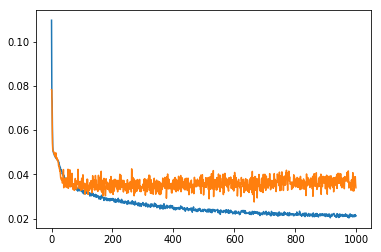

In [27]:
train_score = model.evaluate(train_X, train_Y, batch_size=20)
test_score = model.evaluate(test_X, test_Y, batch_size=20)
print(train_score)
print(test_score)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

In [ ]:
855/855 [==============================] - 0s 77us/step
214/214 [==============================] - 0s 75us/step
[0.04287322972253052, 0.012865497311304885]
[0.04289239124508105, 0.01401869179767983]

In [28]:
model.save('Simulator_w_filter')

In [29]:
model = load_model('Simulator_w_filter')

Test 0
True spectrum: 


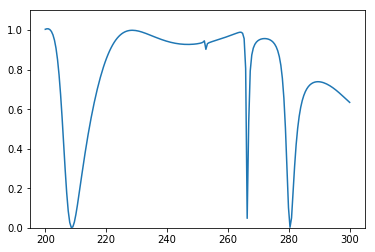

Predicted spectrum: 


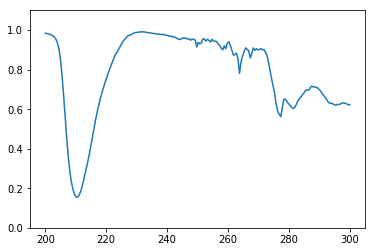

Test 1
True spectrum: 


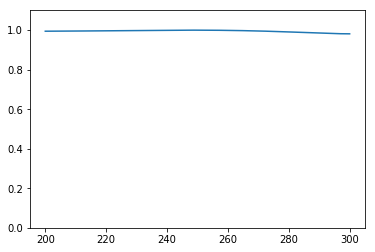

Predicted spectrum: 


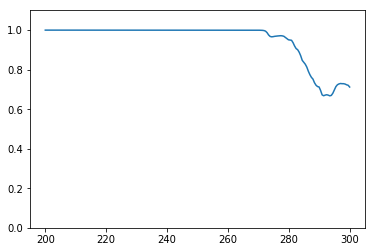

Test 2
True spectrum: 


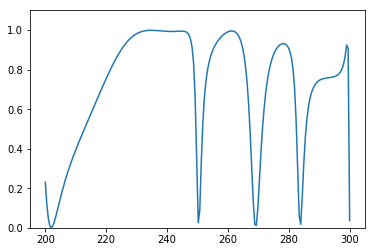

Predicted spectrum: 


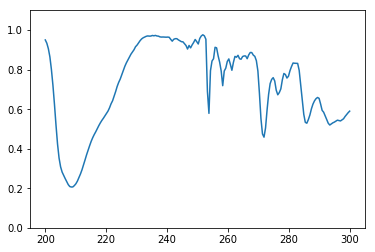

Test 3
True spectrum: 


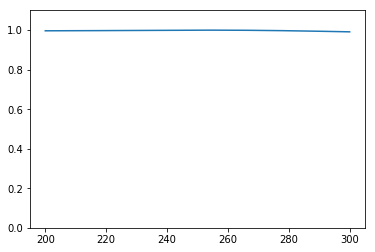

Predicted spectrum: 


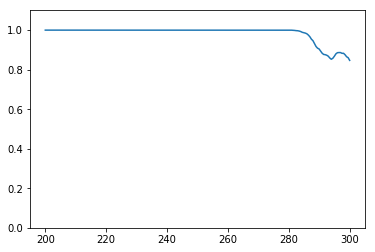

Test 4
True spectrum: 


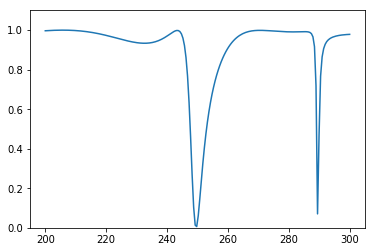

Predicted spectrum: 


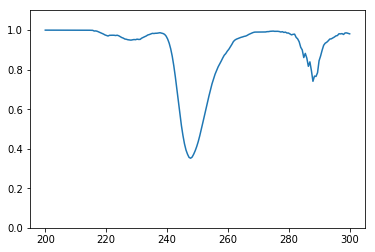

Test 5
True spectrum: 


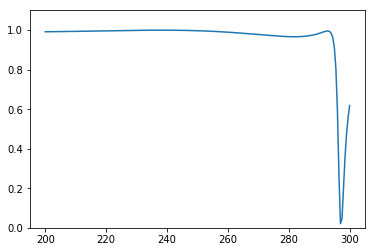

Predicted spectrum: 


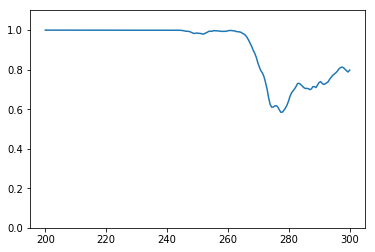

Test 6
True spectrum: 


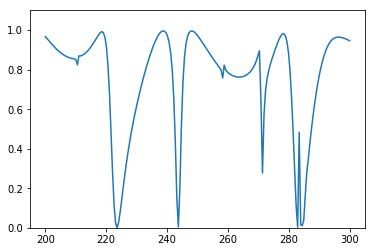

Predicted spectrum: 


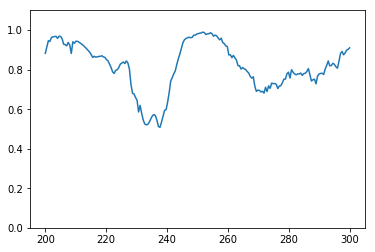

Test 7
True spectrum: 


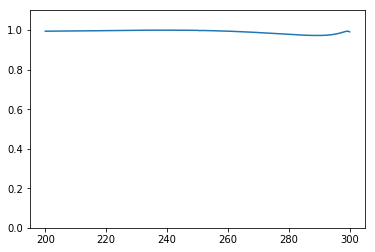

Predicted spectrum: 


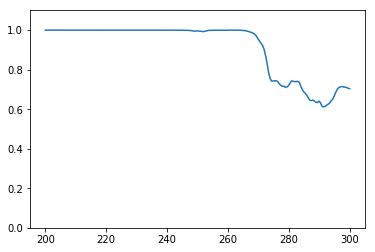

Test 8
True spectrum: 


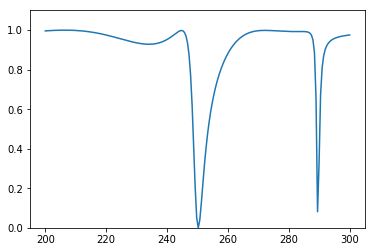

Predicted spectrum: 


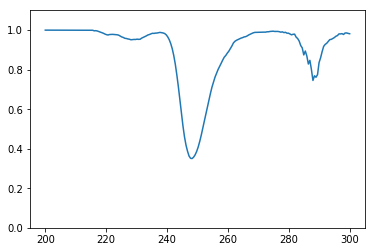

Test 9
True spectrum: 


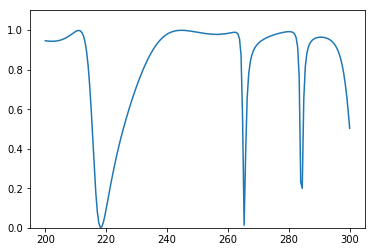

Predicted spectrum: 


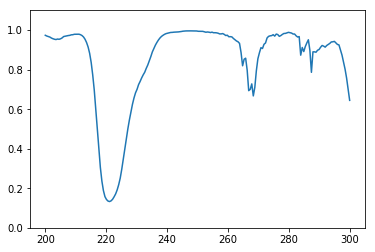

Test 10
True spectrum: 


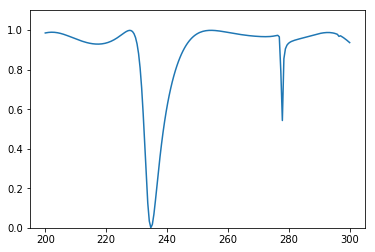

Predicted spectrum: 


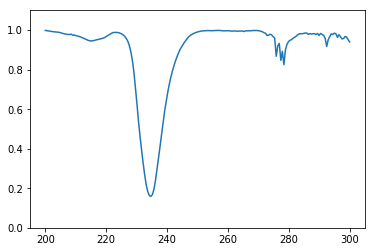

Test 11
True spectrum: 


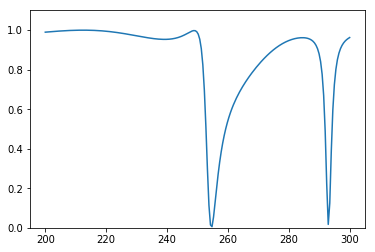

Predicted spectrum: 


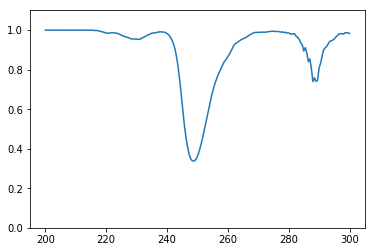

Test 12
True spectrum: 


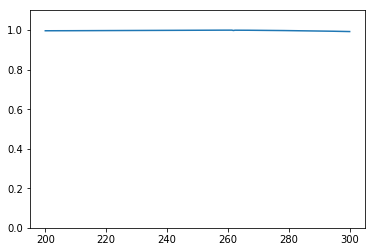

Predicted spectrum: 


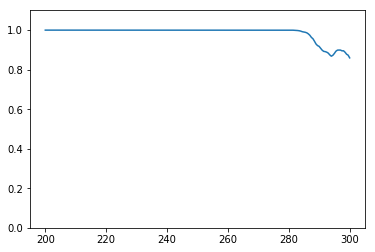

Test 13
True spectrum: 


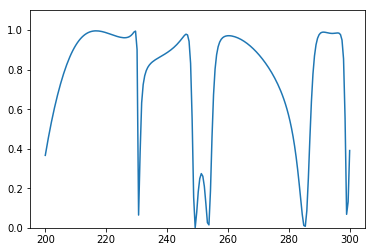

Predicted spectrum: 


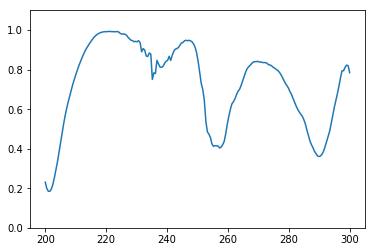

Test 14
True spectrum: 


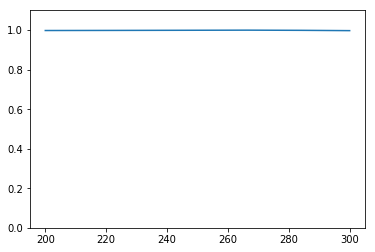

Predicted spectrum: 


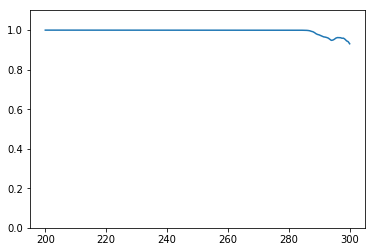

Test 15
True spectrum: 


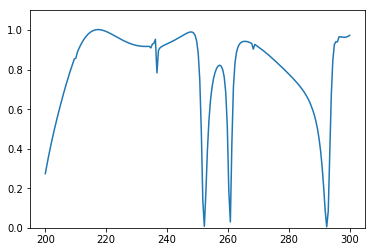

Predicted spectrum: 


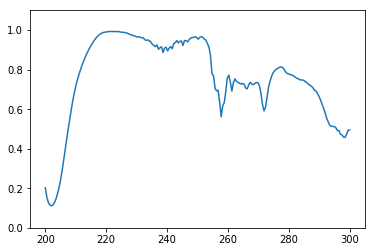

Test 16
True spectrum: 


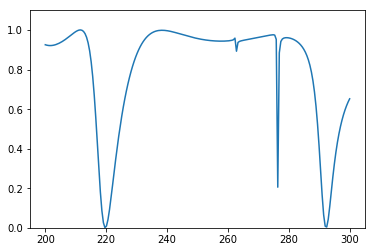

Predicted spectrum: 


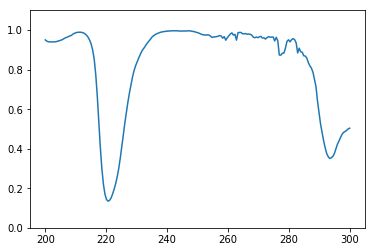

Test 17
True spectrum: 


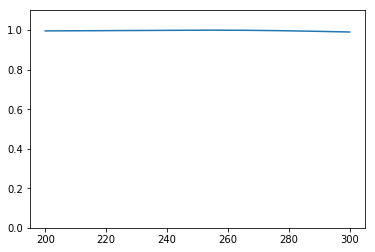

Predicted spectrum: 


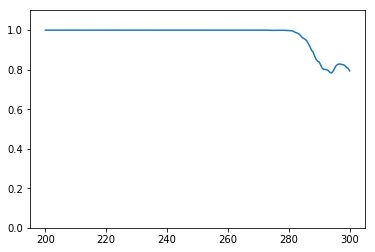

Test 18
True spectrum: 


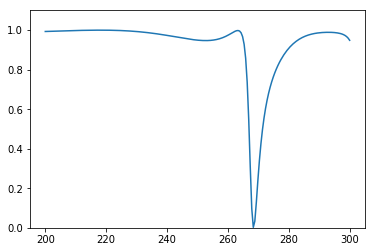

Predicted spectrum: 


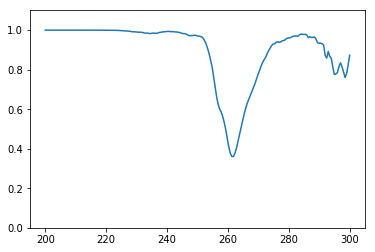

Test 19
True spectrum: 


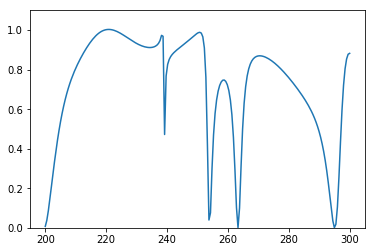

Predicted spectrum: 


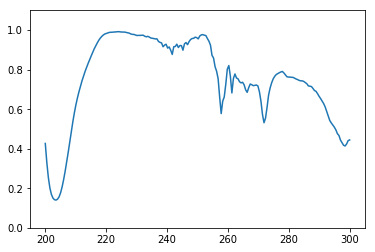

Test 20
True spectrum: 


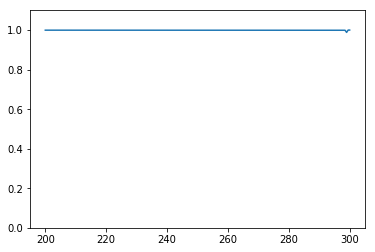

Predicted spectrum: 


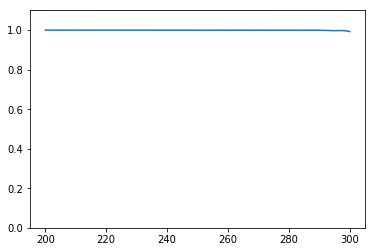

Test 21
True spectrum: 


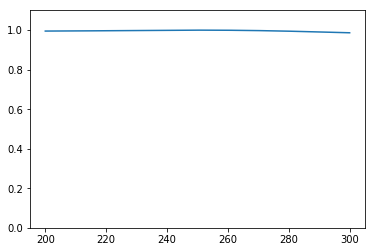

Predicted spectrum: 


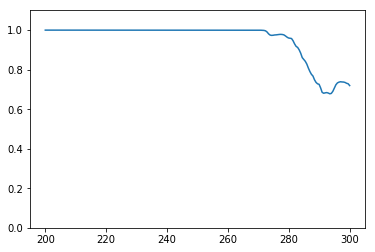

Test 22
True spectrum: 


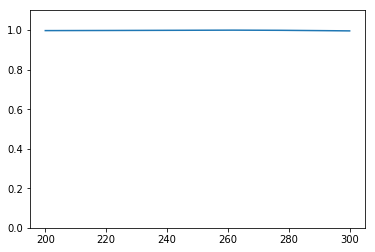

Predicted spectrum: 


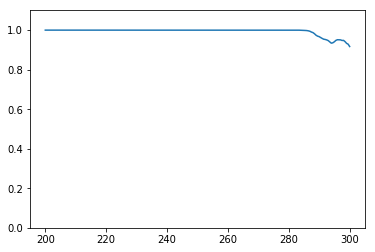

Test 23
True spectrum: 


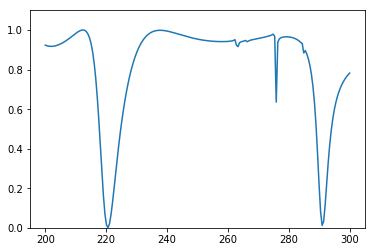

Predicted spectrum: 


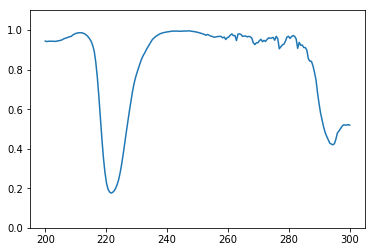

Test 24
True spectrum: 


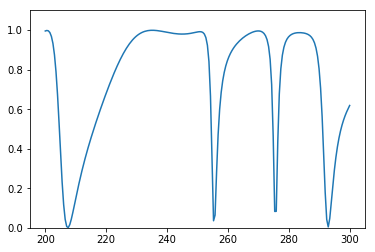

Predicted spectrum: 


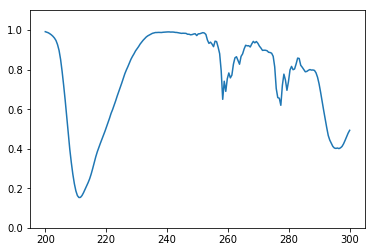

Test 25
True spectrum: 


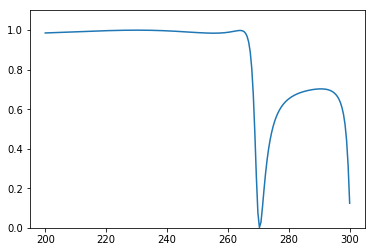

Predicted spectrum: 


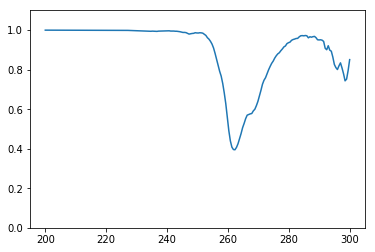

Test 26
True spectrum: 


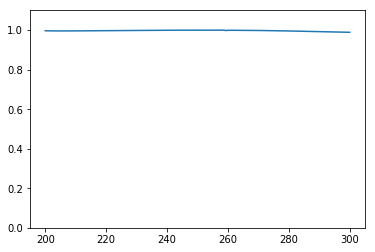

Predicted spectrum: 


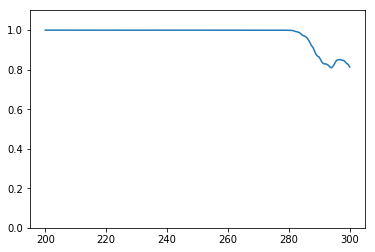

Test 27
True spectrum: 


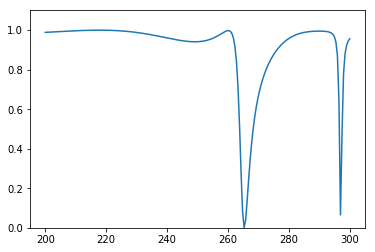

Predicted spectrum: 


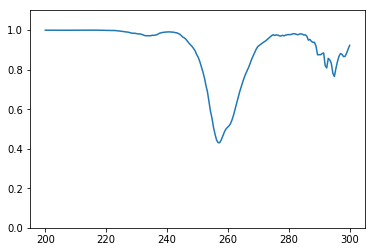

Test 28
True spectrum: 


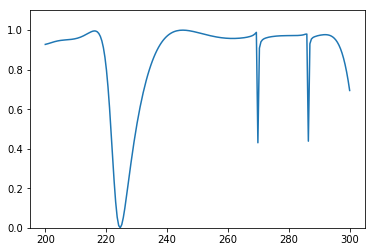

Predicted spectrum: 


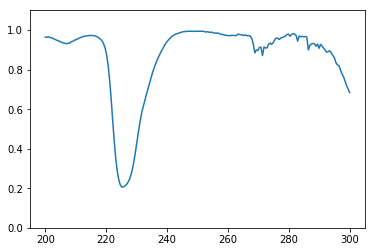

Test 29
True spectrum: 


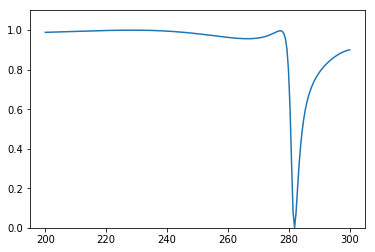

Predicted spectrum: 


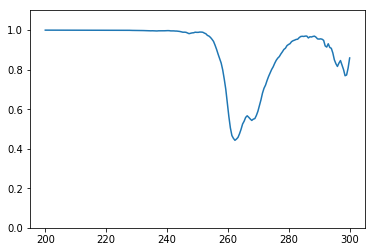

Test 30
True spectrum: 


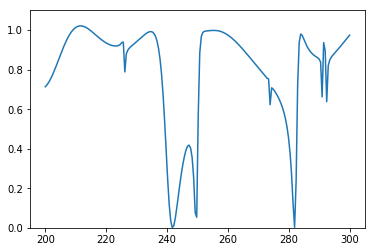

Predicted spectrum: 


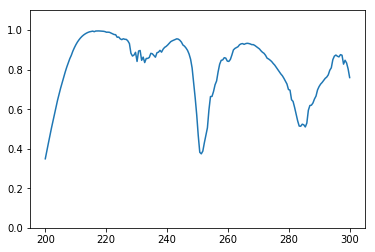

Test 31
True spectrum: 


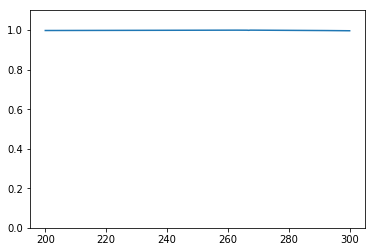

Predicted spectrum: 


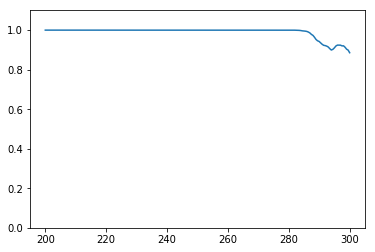

Test 32
True spectrum: 


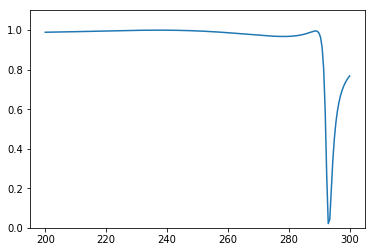

Predicted spectrum: 


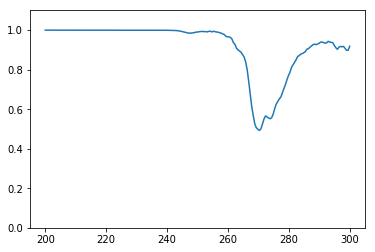

Test 33
True spectrum: 


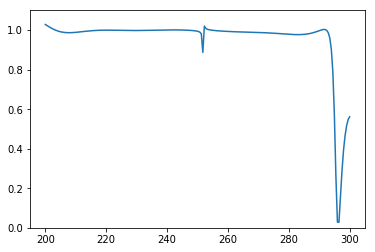

Predicted spectrum: 


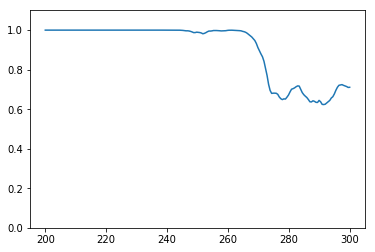

Test 34
True spectrum: 


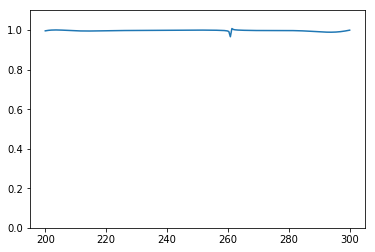

Predicted spectrum: 


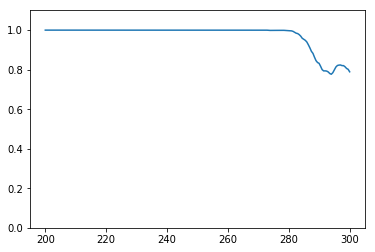

Test 35
True spectrum: 


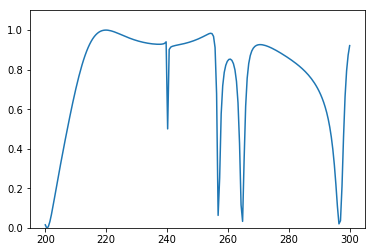

Predicted spectrum: 


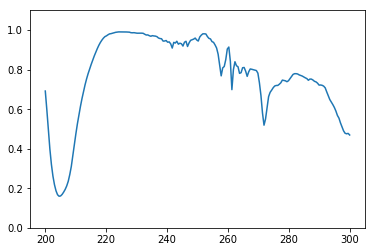

Test 36
True spectrum: 


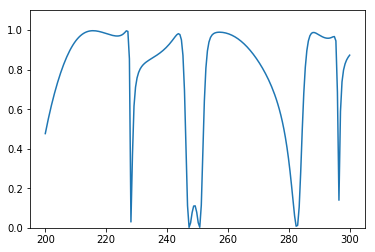

Predicted spectrum: 


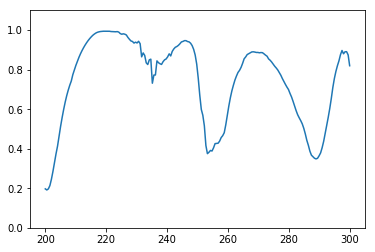

Test 37
True spectrum: 


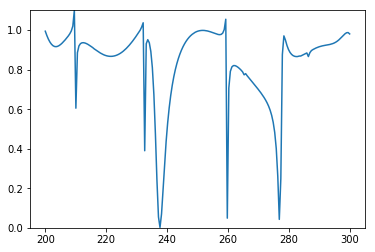

Predicted spectrum: 


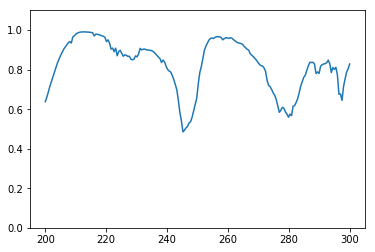

Test 38
True spectrum: 


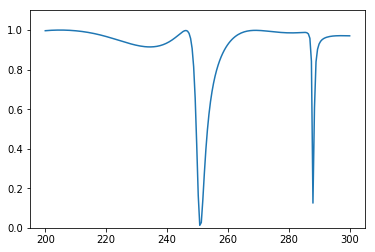

Predicted spectrum: 


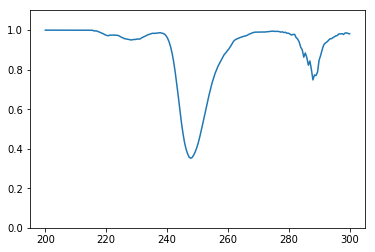

Test 39
True spectrum: 


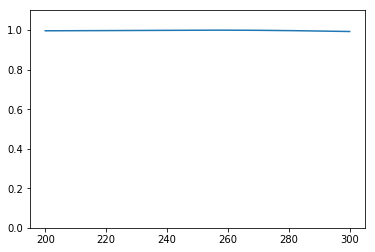

Predicted spectrum: 


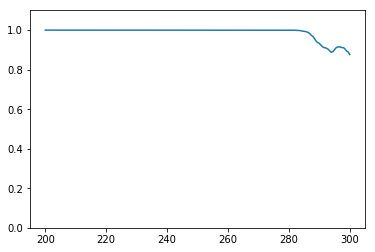

Test 40
True spectrum: 


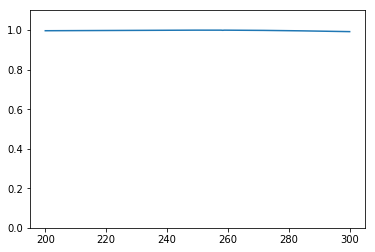

Predicted spectrum: 


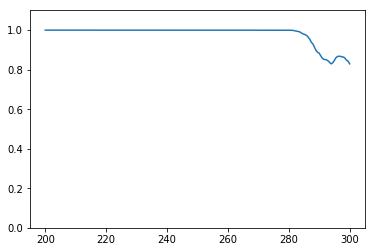

Test 41
True spectrum: 


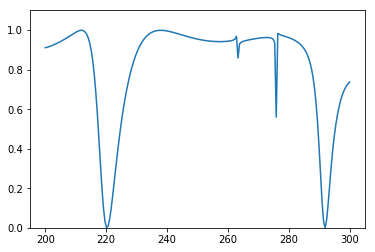

Predicted spectrum: 


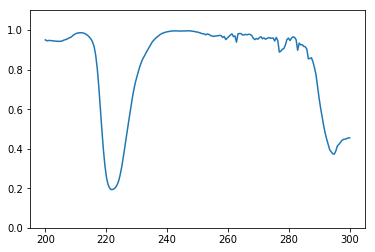

Test 42
True spectrum: 


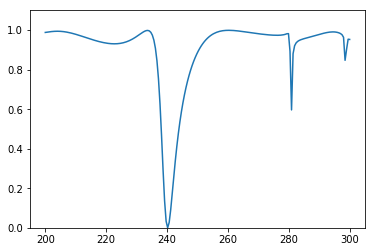

Predicted spectrum: 


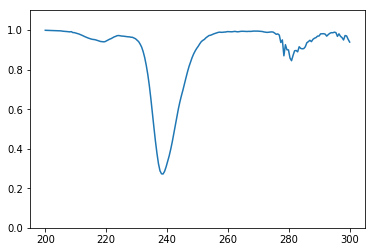

Test 43
True spectrum: 


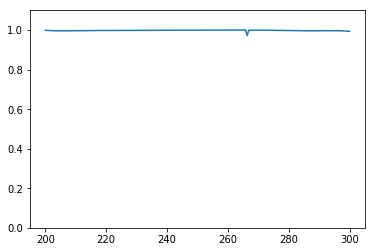

Predicted spectrum: 


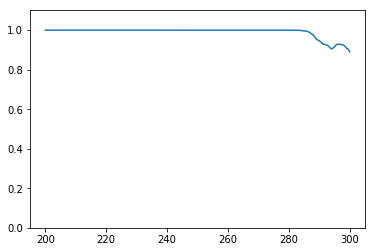

Test 44
True spectrum: 


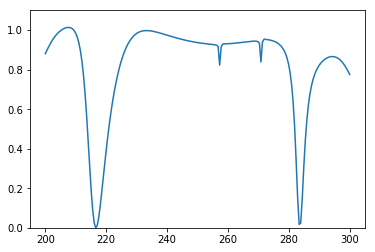

Predicted spectrum: 


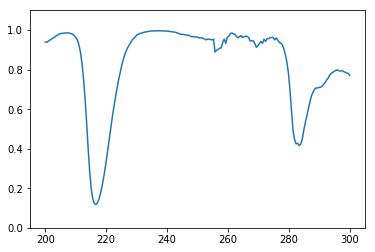

Test 45
True spectrum: 


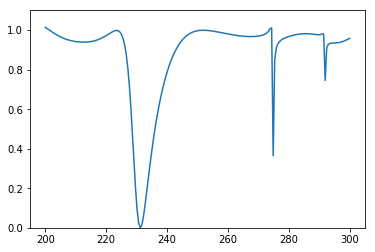

Predicted spectrum: 


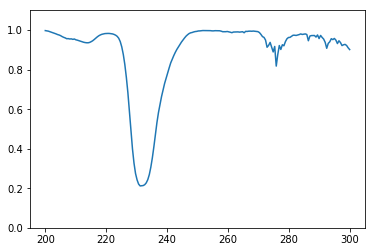

Test 46
True spectrum: 


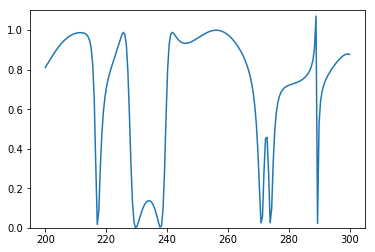

Predicted spectrum: 


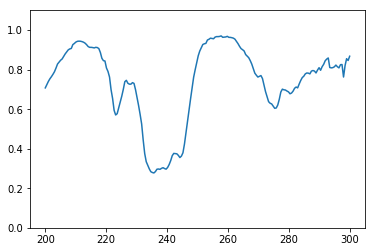

Test 47
True spectrum: 


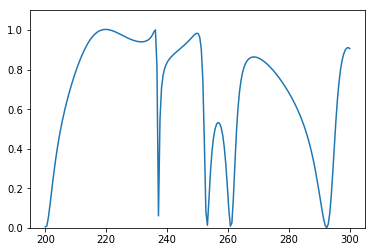

Predicted spectrum: 


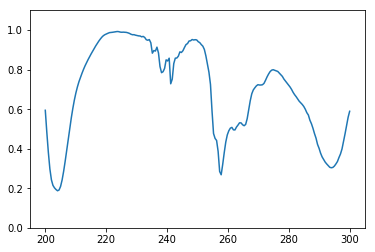

Test 48
True spectrum: 


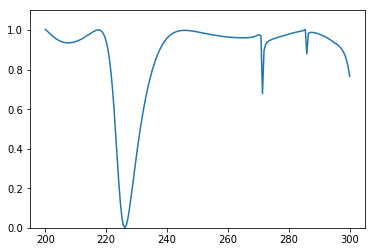

Predicted spectrum: 


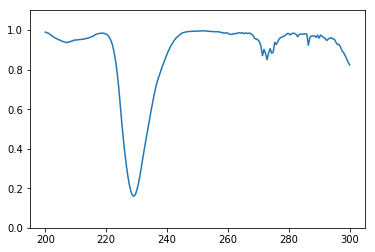

Test 49
True spectrum: 


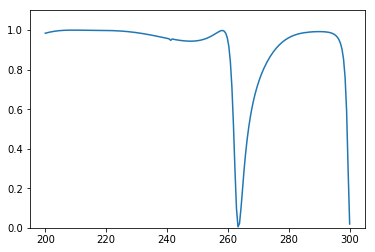

Predicted spectrum: 


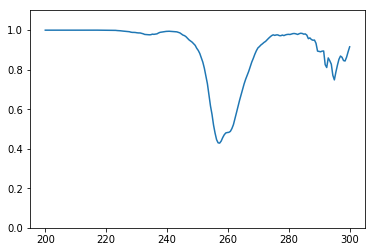

Test 50
True spectrum: 


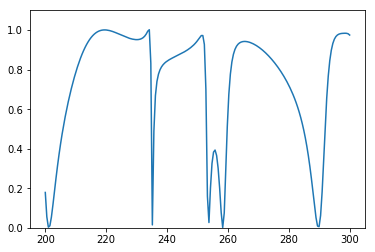

Predicted spectrum: 


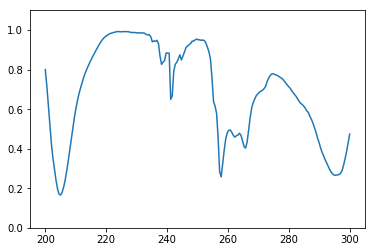

Test 51
True spectrum: 


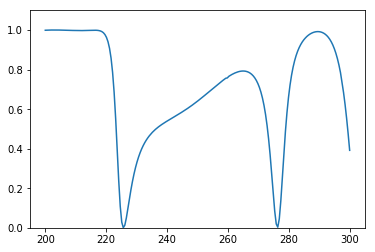

Predicted spectrum: 


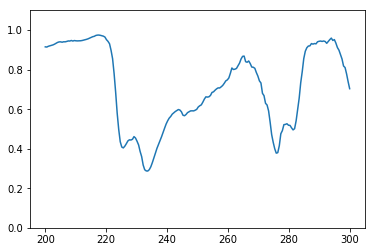

Test 52
True spectrum: 


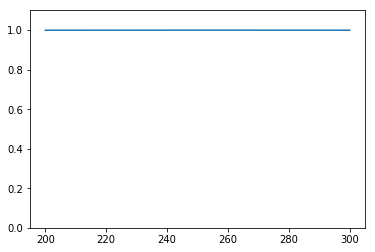

Predicted spectrum: 


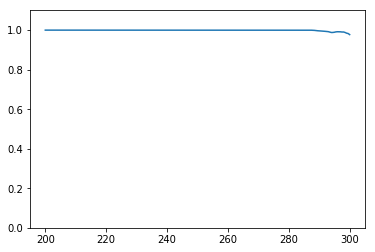

Test 53
True spectrum: 


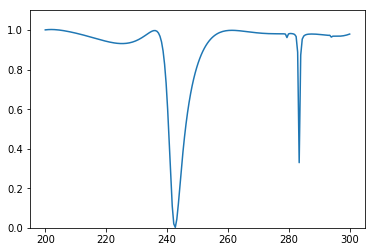

Predicted spectrum: 


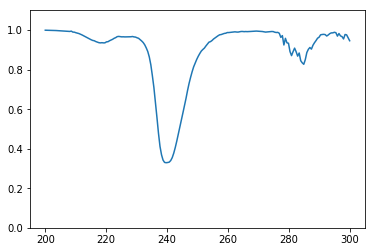

Test 54
True spectrum: 


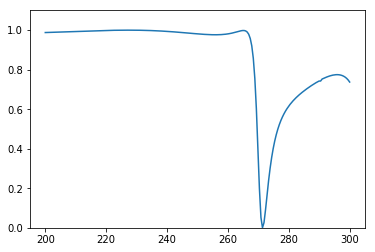

Predicted spectrum: 


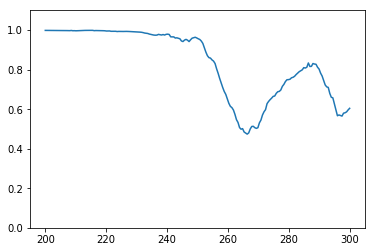

Test 55
True spectrum: 


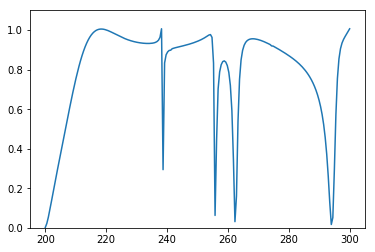

Predicted spectrum: 


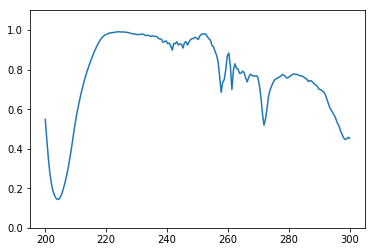

Test 56
True spectrum: 


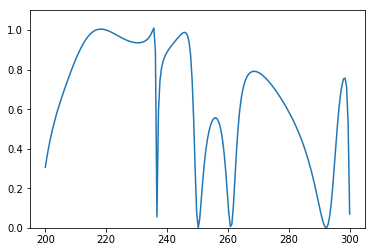

Predicted spectrum: 


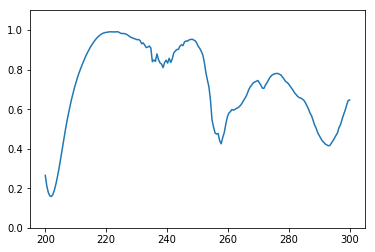

Test 57
True spectrum: 


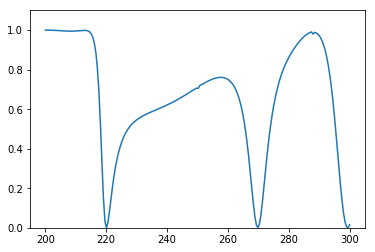

Predicted spectrum: 


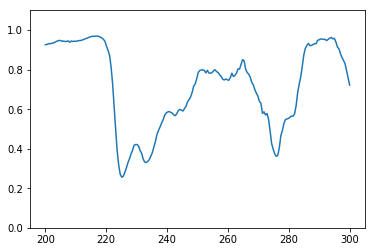

Test 58
True spectrum: 


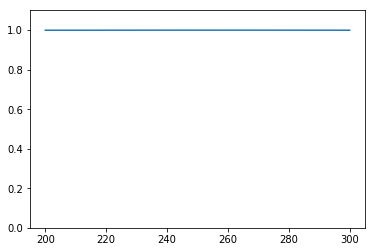

Predicted spectrum: 


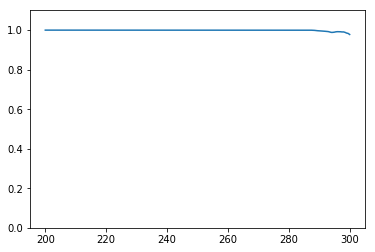

Test 59
True spectrum: 


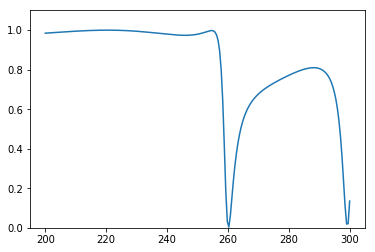

Predicted spectrum: 


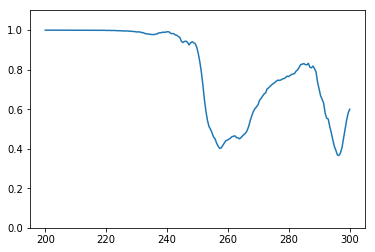

Test 60
True spectrum: 


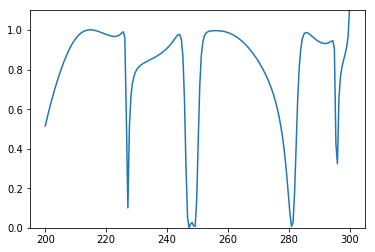

Predicted spectrum: 


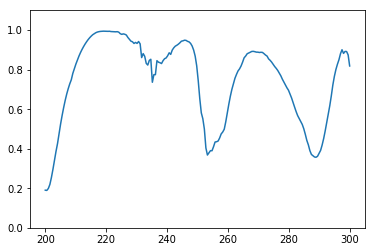

Test 61
True spectrum: 


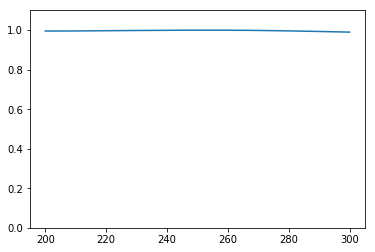

Predicted spectrum: 


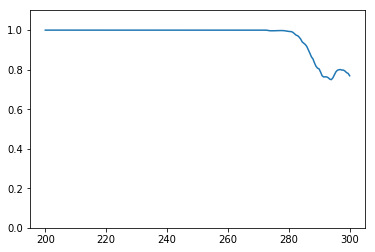

Test 62
True spectrum: 


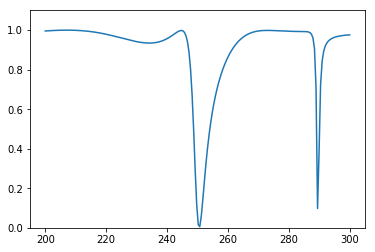

Predicted spectrum: 


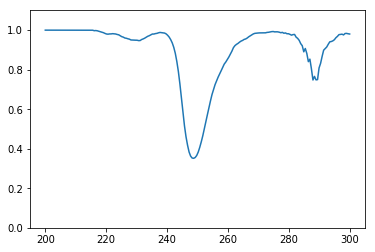

Test 63
True spectrum: 


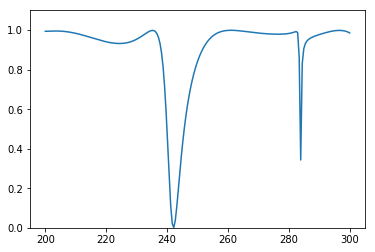

Predicted spectrum: 


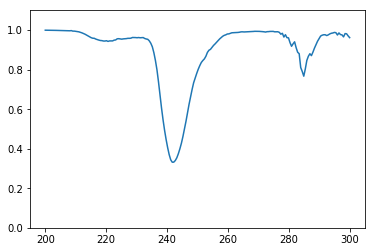

Test 64
True spectrum: 


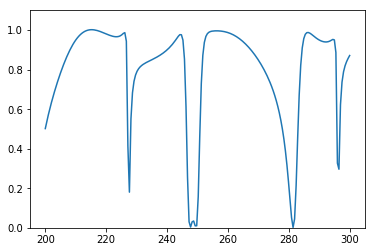

Predicted spectrum: 


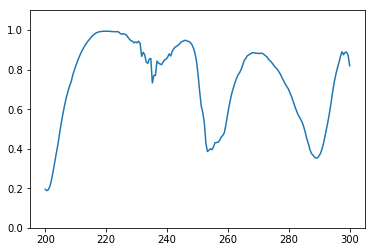

Test 65
True spectrum: 


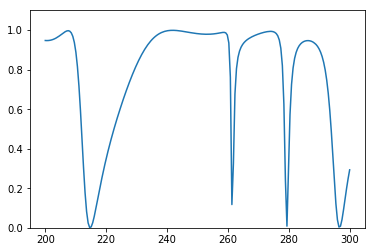

Predicted spectrum: 


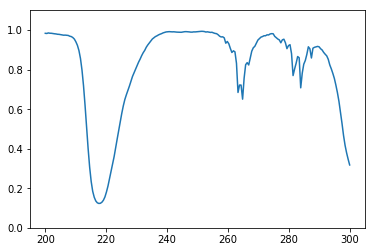

Test 66
True spectrum: 


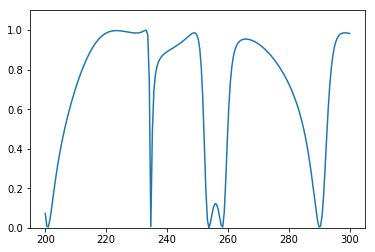

Predicted spectrum: 


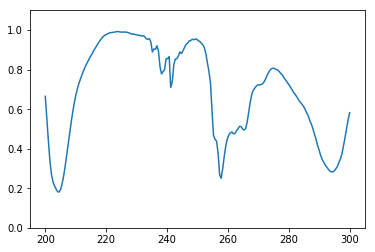

Test 67
True spectrum: 


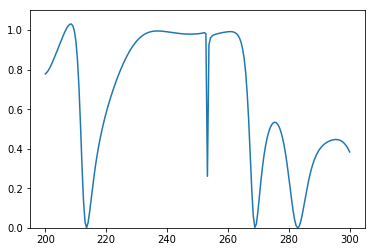

Predicted spectrum: 


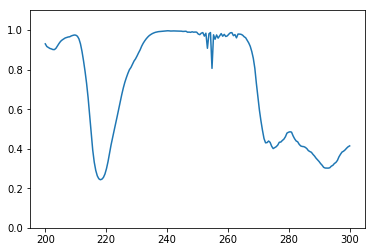

Test 68
True spectrum: 


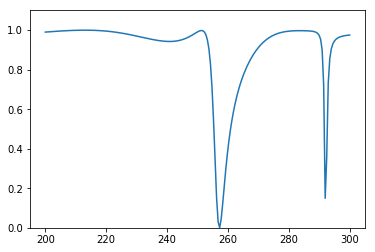

Predicted spectrum: 


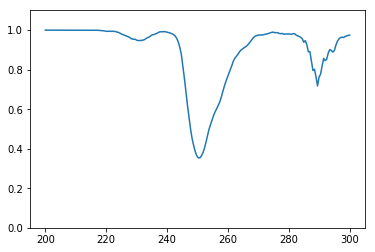

Test 69
True spectrum: 


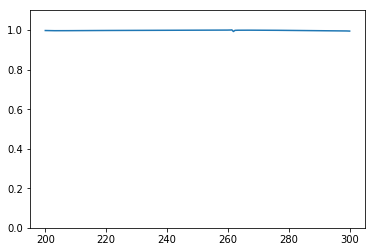

Predicted spectrum: 


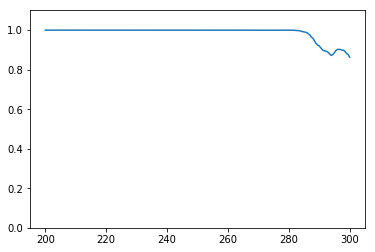

Test 70
True spectrum: 


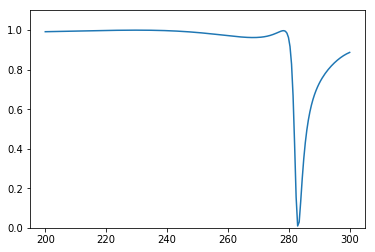

Predicted spectrum: 


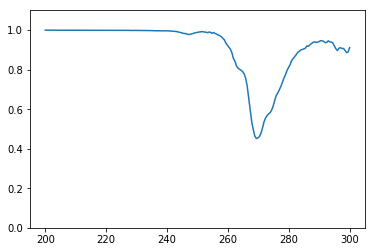

Test 71
True spectrum: 


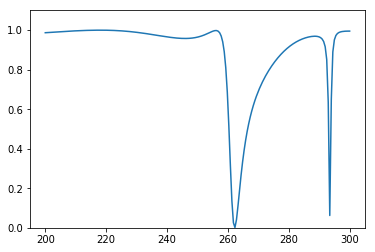

Predicted spectrum: 


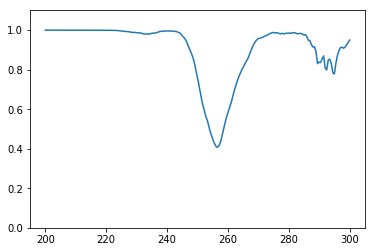

Test 72
True spectrum: 


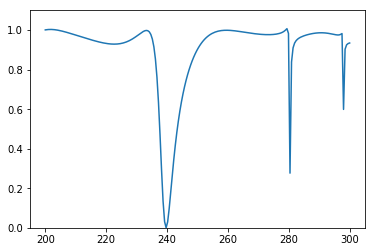

Predicted spectrum: 


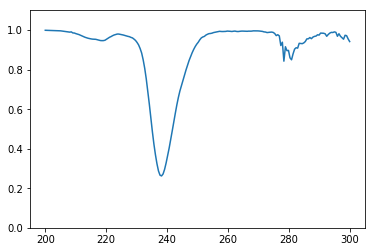

Test 73
True spectrum: 


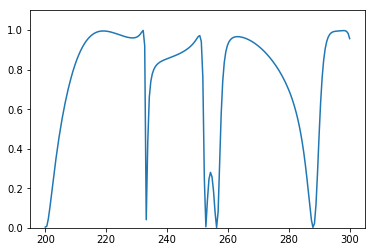

Predicted spectrum: 


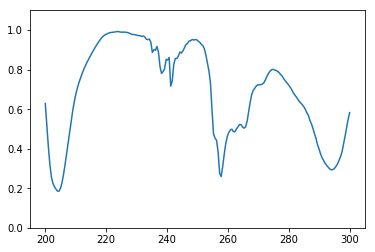

Test 74
True spectrum: 


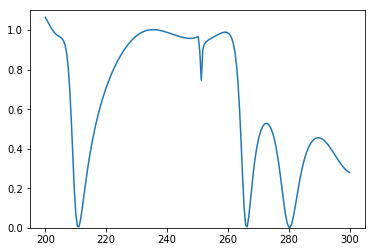

Predicted spectrum: 


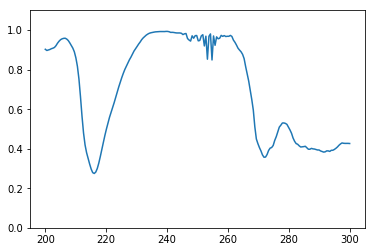

Test 75
True spectrum: 


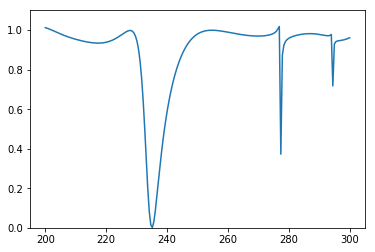

Predicted spectrum: 


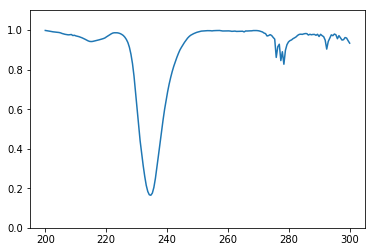

Test 76
True spectrum: 


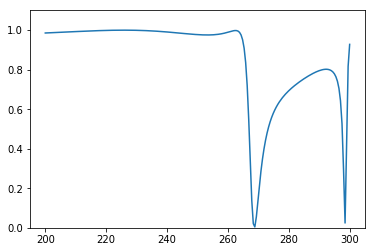

Predicted spectrum: 


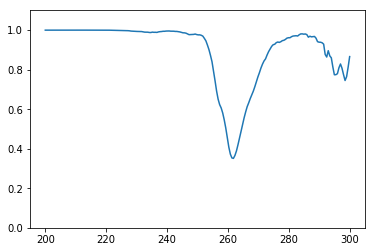

Test 77
True spectrum: 


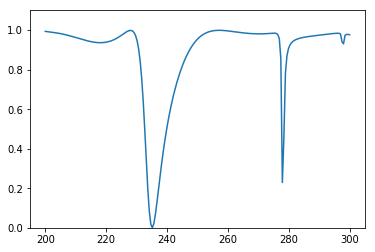

Predicted spectrum: 


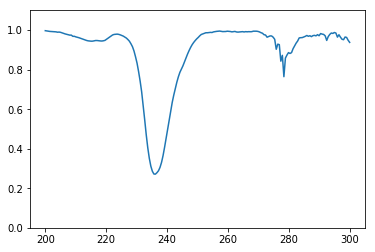

Test 78
True spectrum: 


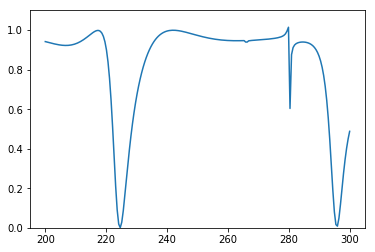

Predicted spectrum: 


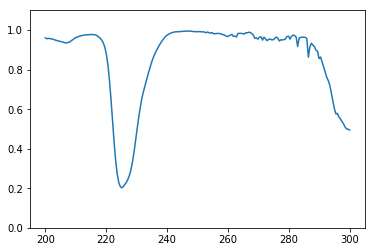

Test 79
True spectrum: 


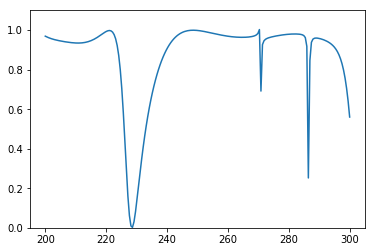

Predicted spectrum: 


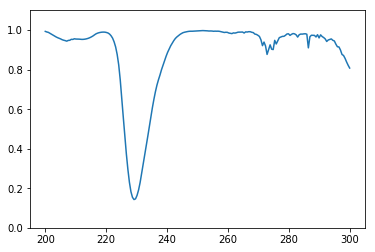

Test 80
True spectrum: 


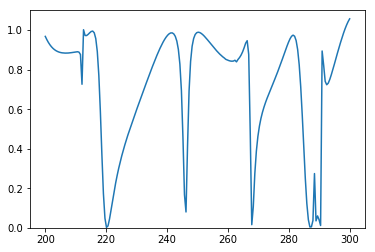

Predicted spectrum: 


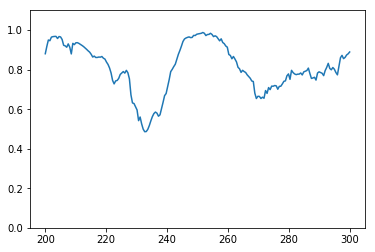

Test 81
True spectrum: 


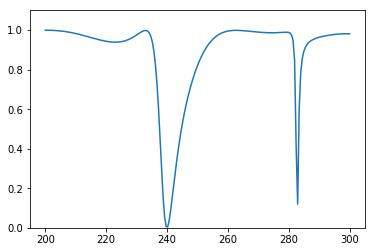

Predicted spectrum: 


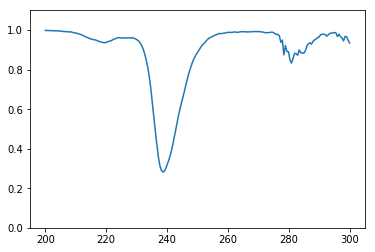

Test 82
True spectrum: 


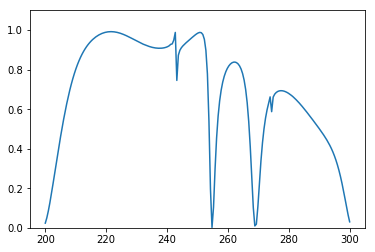

Predicted spectrum: 


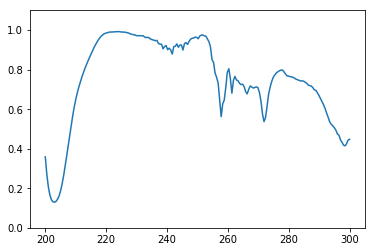

Test 83
True spectrum: 


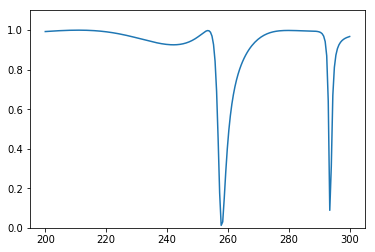

Predicted spectrum: 


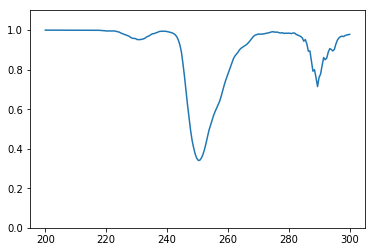

Test 84
True spectrum: 


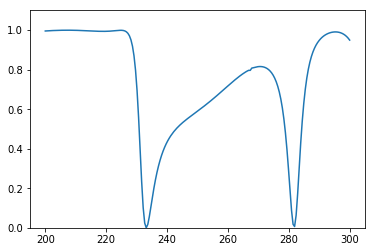

Predicted spectrum: 


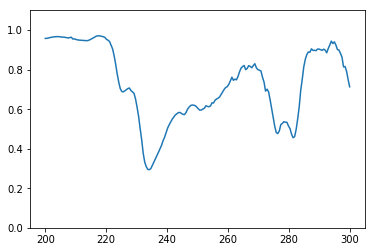

Test 85
True spectrum: 


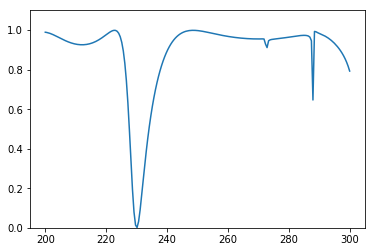

Predicted spectrum: 


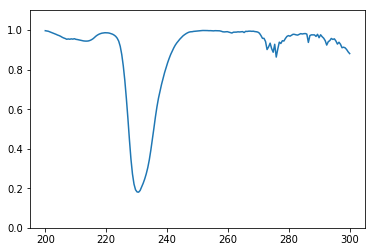

Test 86
True spectrum: 


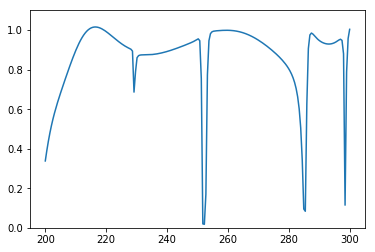

Predicted spectrum: 


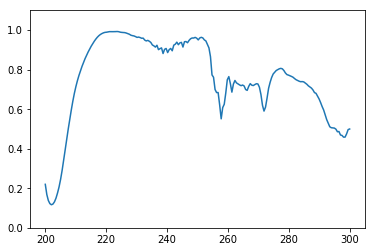

Test 87
True spectrum: 


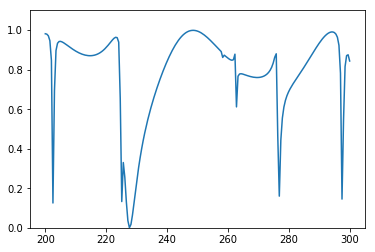

Predicted spectrum: 


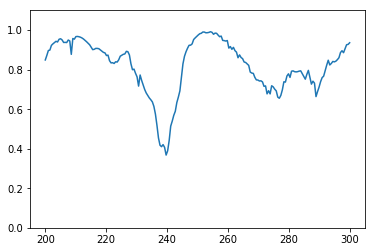

Test 88
True spectrum: 


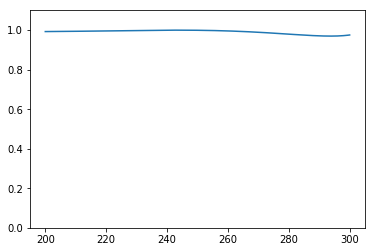

Predicted spectrum: 


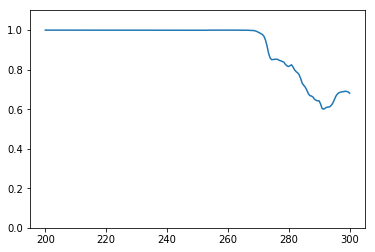

Test 89
True spectrum: 


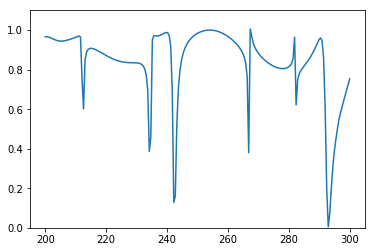

Predicted spectrum: 


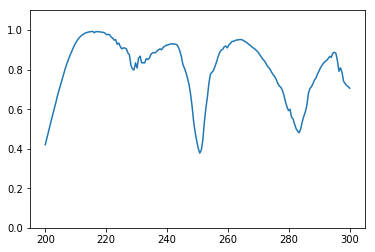

Test 90
True spectrum: 


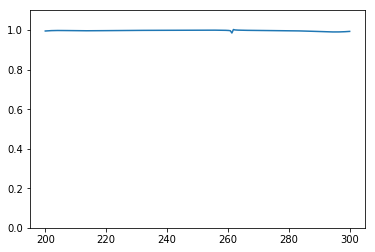

Predicted spectrum: 


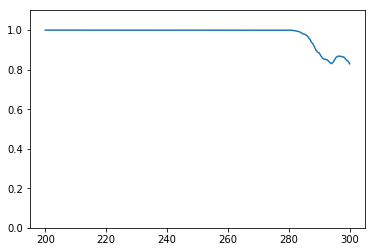

Test 91
True spectrum: 


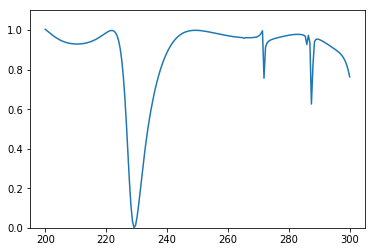

Predicted spectrum: 


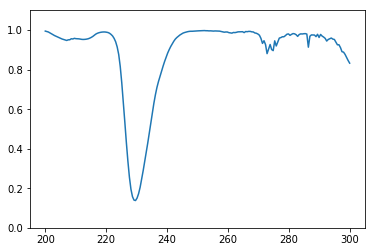

Test 92
True spectrum: 


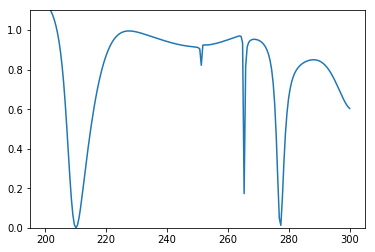

Predicted spectrum: 


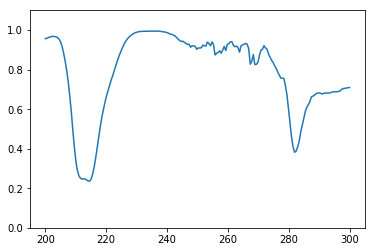

Test 93
True spectrum: 


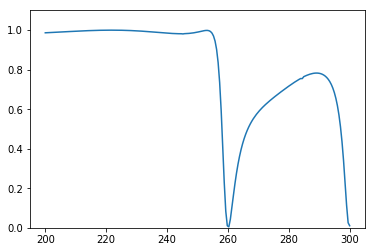

Predicted spectrum: 


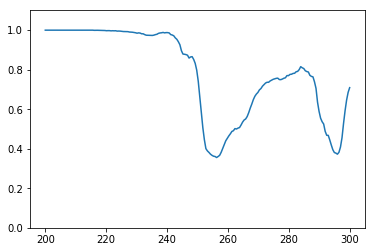

Test 94
True spectrum: 


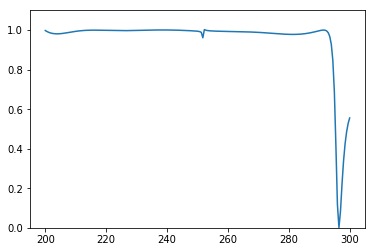

Predicted spectrum: 


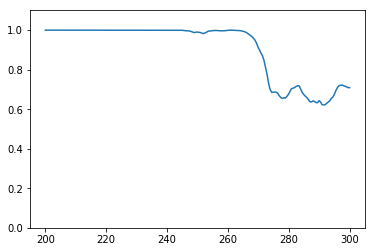

Test 95
True spectrum: 


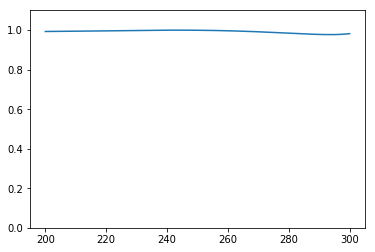

Predicted spectrum: 


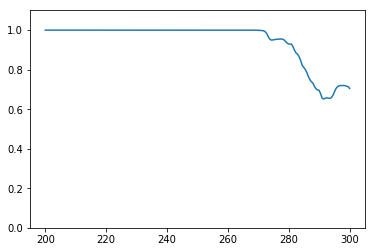

Test 96
True spectrum: 


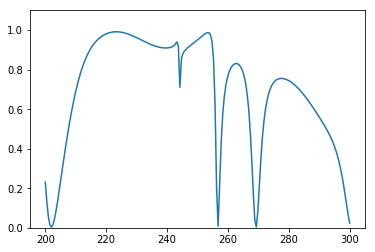

Predicted spectrum: 


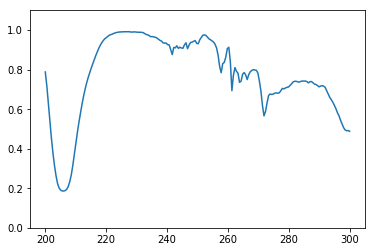

Test 97
True spectrum: 


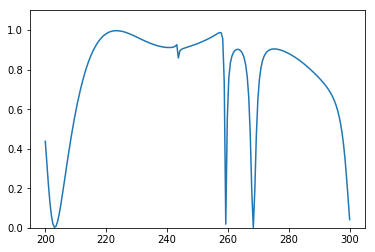

Predicted spectrum: 


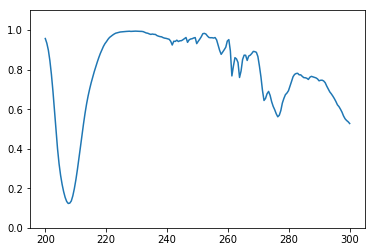

Test 98
True spectrum: 


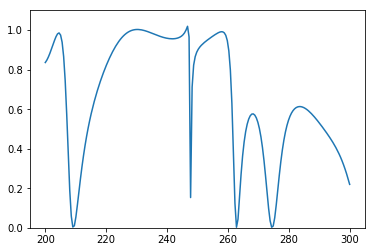

Predicted spectrum: 


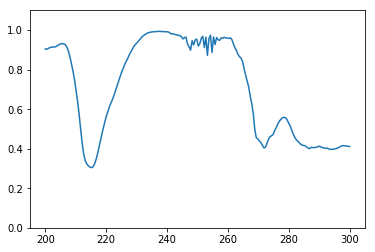

Test 99
True spectrum: 


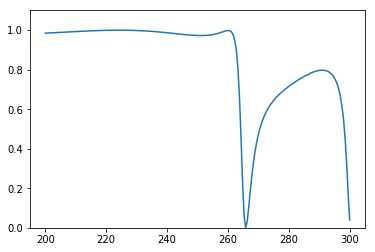

Predicted spectrum: 


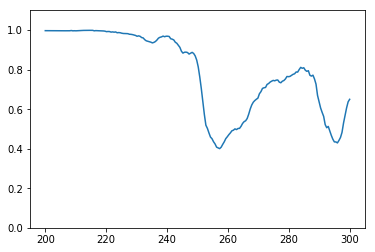

Test 100
True spectrum: 


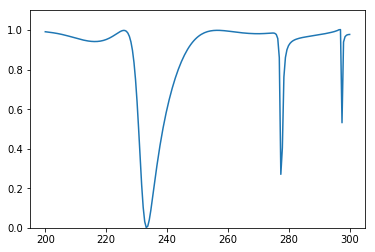

Predicted spectrum: 


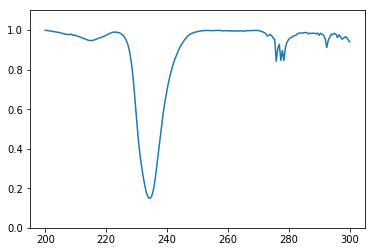

Test 101
True spectrum: 


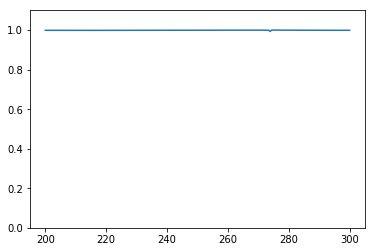

Predicted spectrum: 


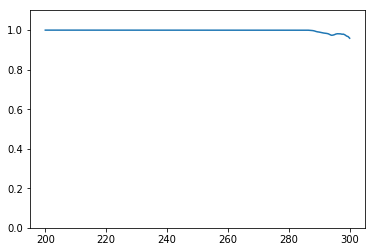

Test 102
True spectrum: 


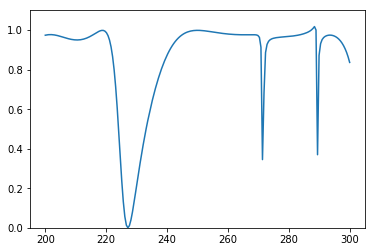

Predicted spectrum: 


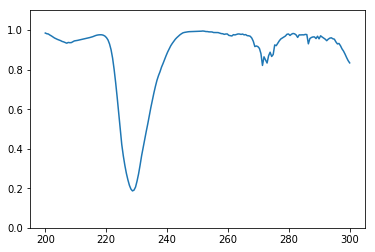

Test 103
True spectrum: 


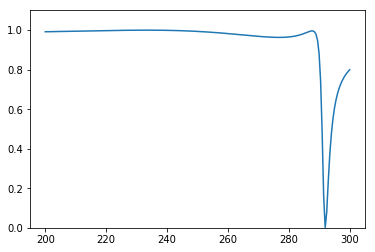

Predicted spectrum: 


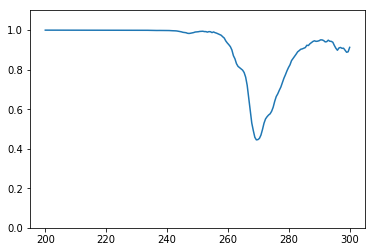

Test 104
True spectrum: 


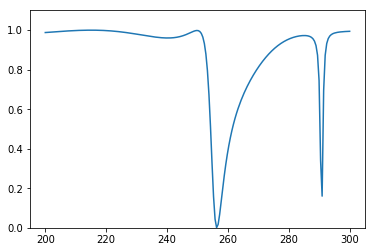

Predicted spectrum: 


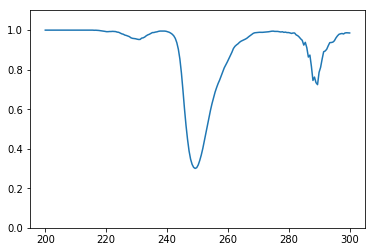

Test 105
True spectrum: 


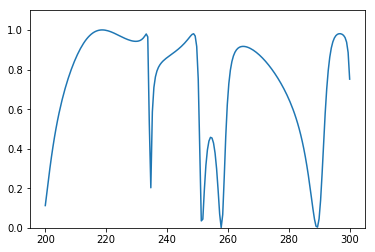

Predicted spectrum: 


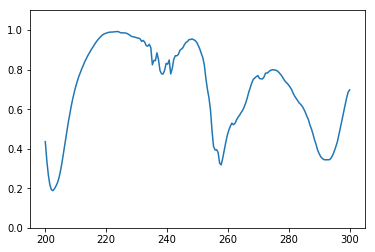

Test 106
True spectrum: 


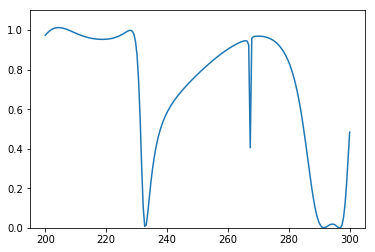

Predicted spectrum: 


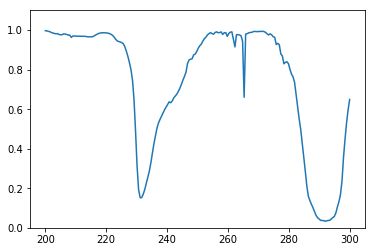

Test 107
True spectrum: 


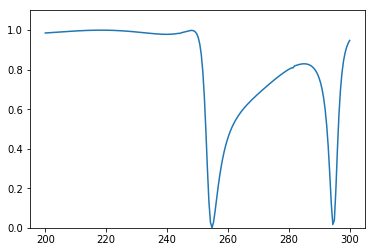

Predicted spectrum: 


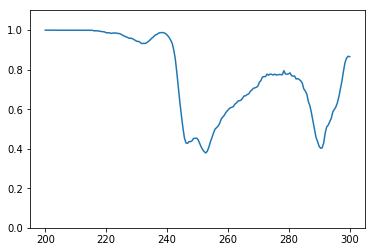

Test 108
True spectrum: 


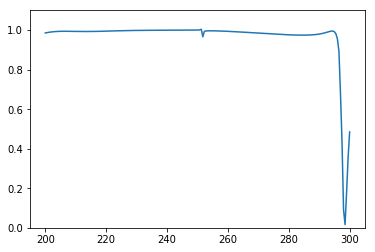

Predicted spectrum: 


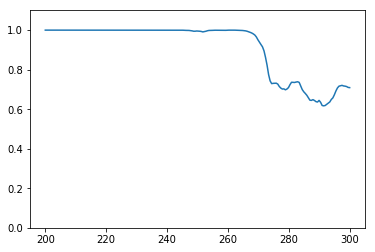

Test 109
True spectrum: 


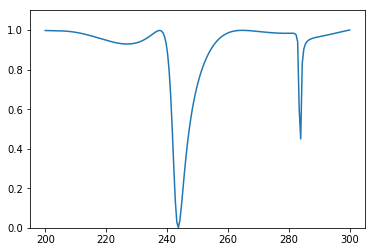

Predicted spectrum: 


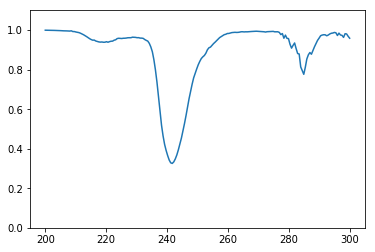

Test 110
True spectrum: 


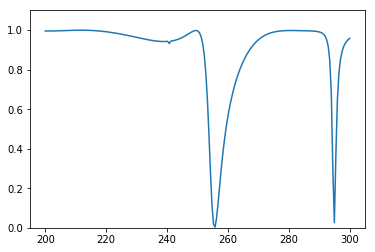

Predicted spectrum: 


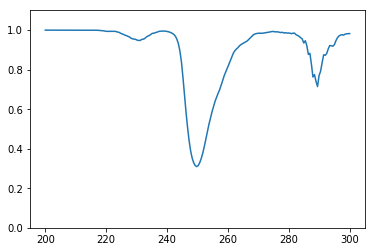

Test 111
True spectrum: 


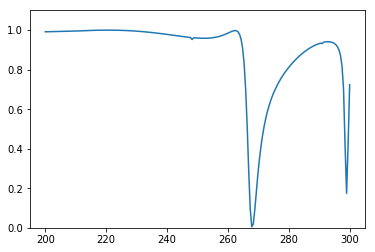

Predicted spectrum: 


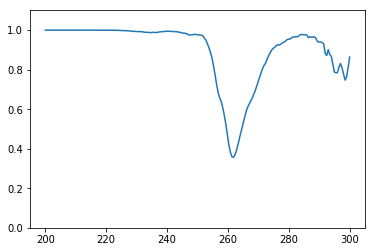

Test 112
True spectrum: 


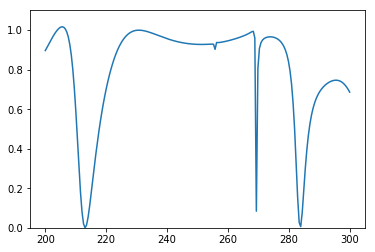

Predicted spectrum: 


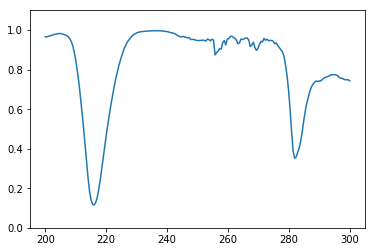

Test 113
True spectrum: 


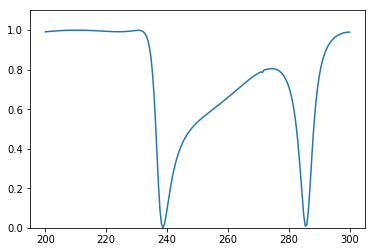

Predicted spectrum: 


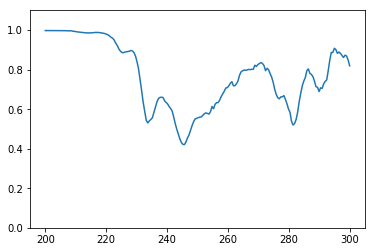

Test 114
True spectrum: 


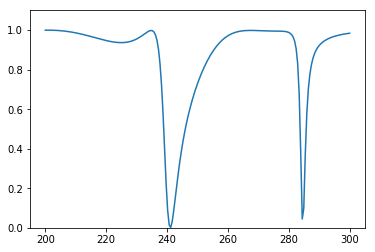

Predicted spectrum: 


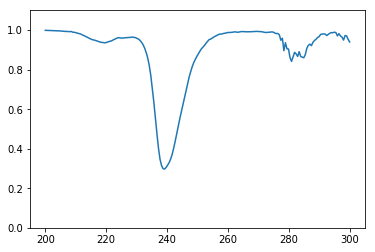

Test 115
True spectrum: 


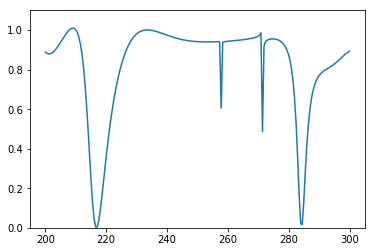

Predicted spectrum: 


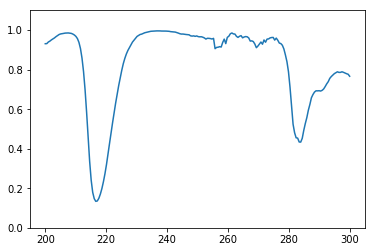

Test 116
True spectrum: 


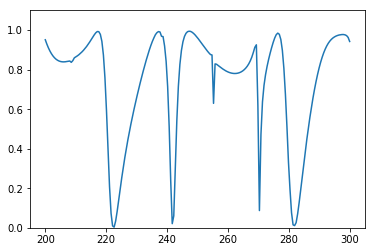

Predicted spectrum: 


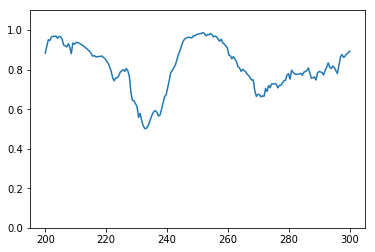

Test 117
True spectrum: 


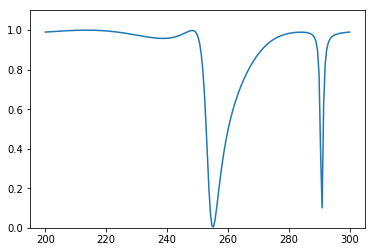

Predicted spectrum: 


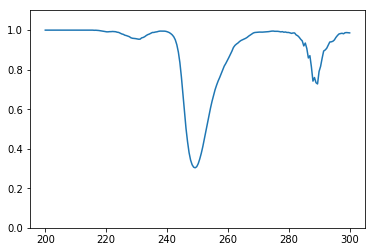

Test 118
True spectrum: 


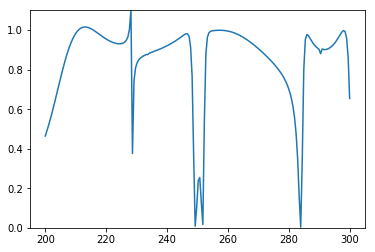

Predicted spectrum: 


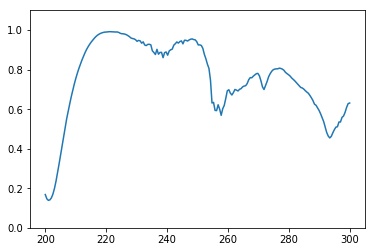

Test 119
True spectrum: 


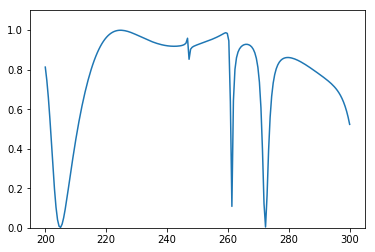

Predicted spectrum: 


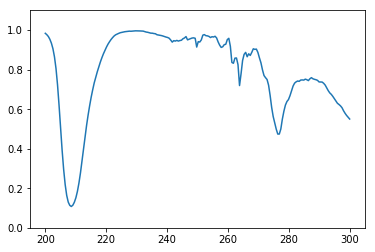

Test 120
True spectrum: 


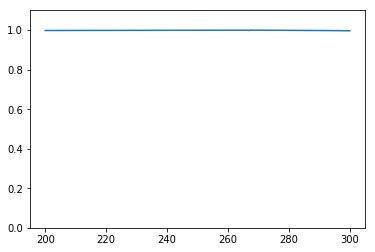

Predicted spectrum: 


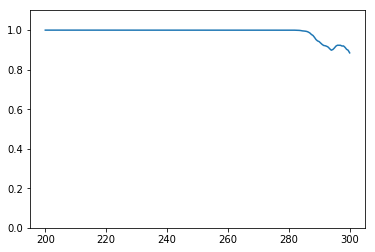

Test 121
True spectrum: 


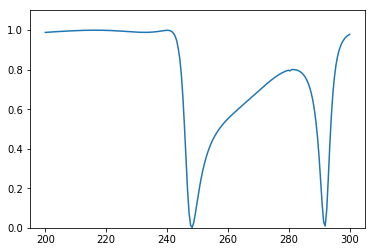

Predicted spectrum: 


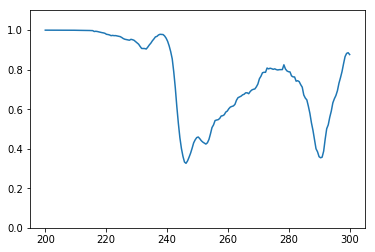

Test 122
True spectrum: 


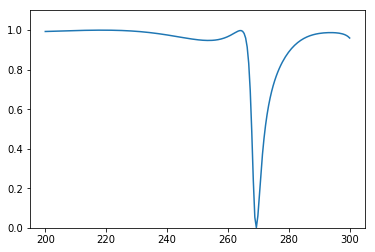

Predicted spectrum: 


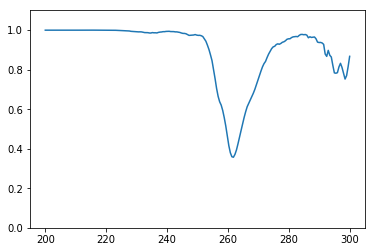

Test 123
True spectrum: 


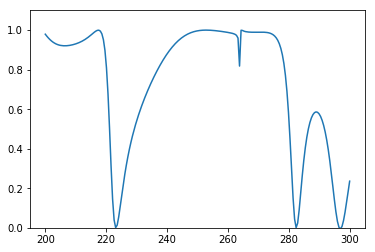

Predicted spectrum: 


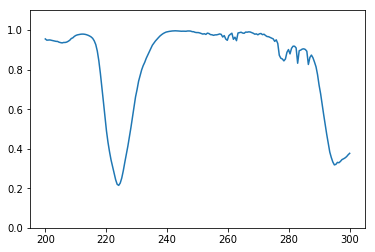

Test 124
True spectrum: 


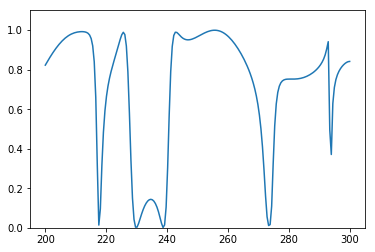

Predicted spectrum: 


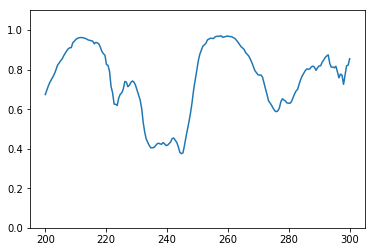

Test 125
True spectrum: 


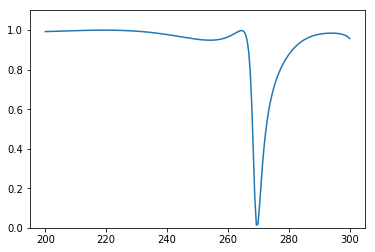

Predicted spectrum: 


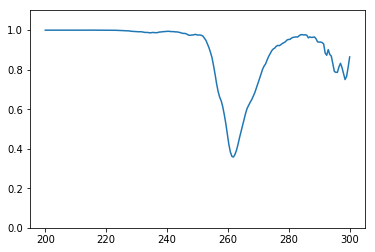

Test 126
True spectrum: 


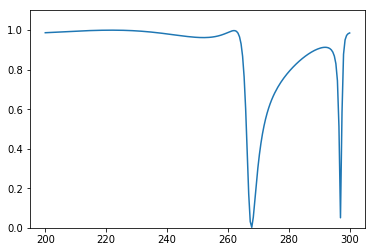

Predicted spectrum: 


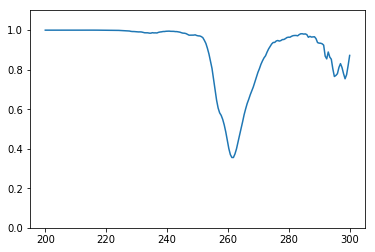

Test 127
True spectrum: 


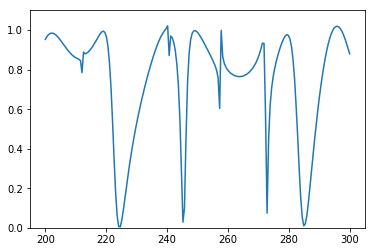

Predicted spectrum: 


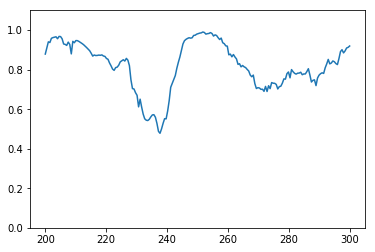

Test 128
True spectrum: 


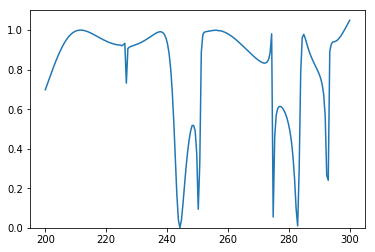

Predicted spectrum: 


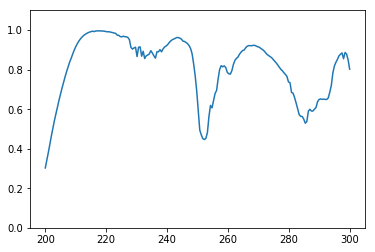

Test 129
True spectrum: 


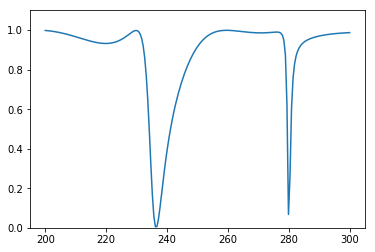

Predicted spectrum: 


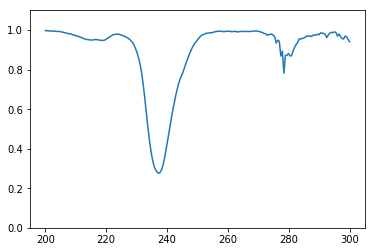

Test 130
True spectrum: 


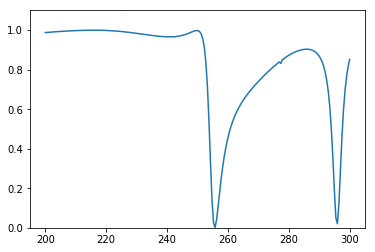

Predicted spectrum: 


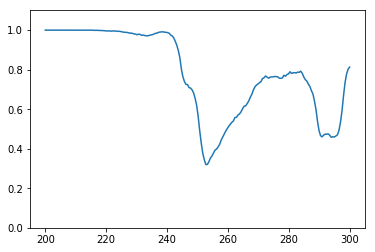

Test 131
True spectrum: 


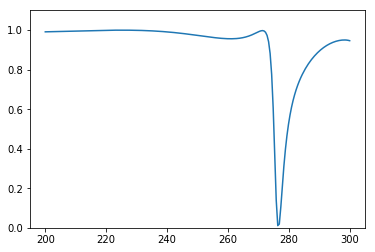

Predicted spectrum: 


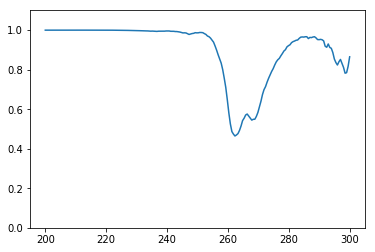

Test 132
True spectrum: 


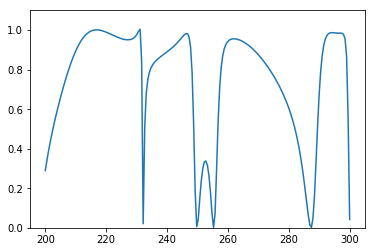

Predicted spectrum: 


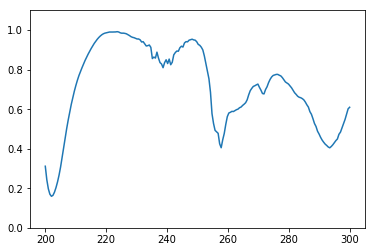

Test 133
True spectrum: 


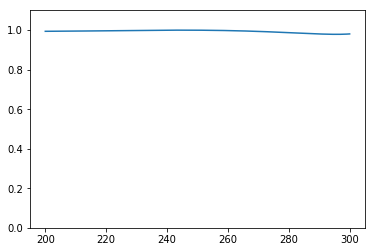

Predicted spectrum: 


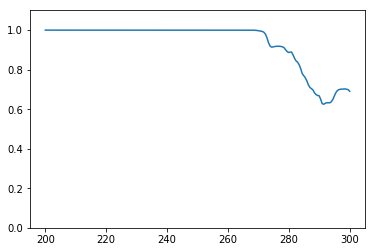

Test 134
True spectrum: 


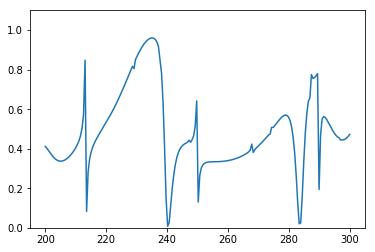

Predicted spectrum: 


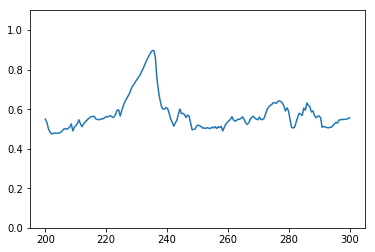

Test 135
True spectrum: 


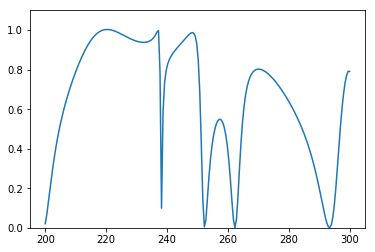

Predicted spectrum: 


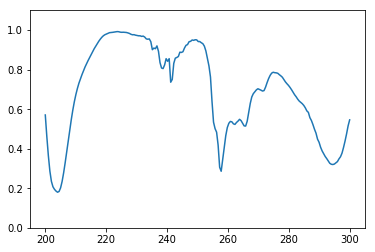

Test 136
True spectrum: 


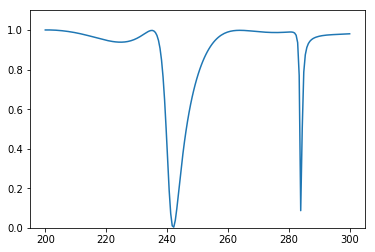

Predicted spectrum: 


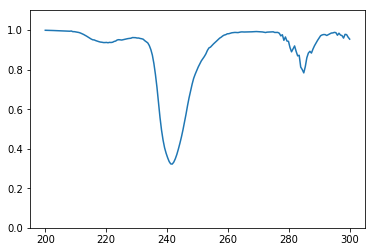

Test 137
True spectrum: 


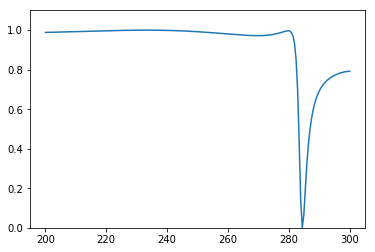

Predicted spectrum: 


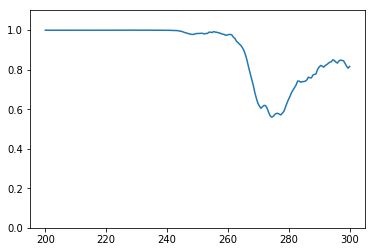

Test 138
True spectrum: 


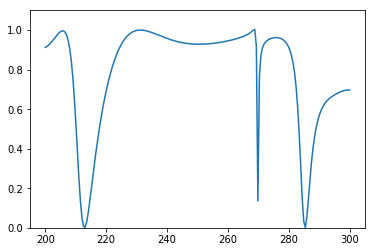

Predicted spectrum: 


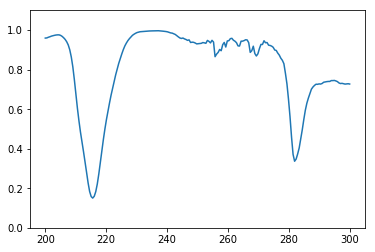

Test 139
True spectrum: 


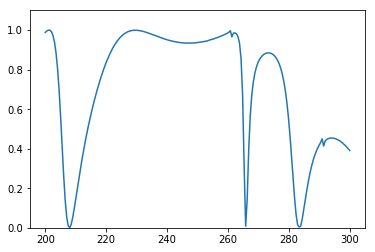

Predicted spectrum: 


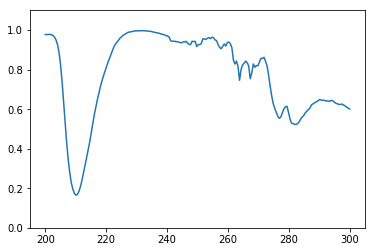

Test 140
True spectrum: 


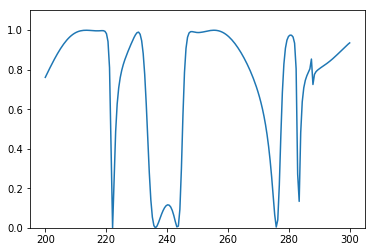

Predicted spectrum: 


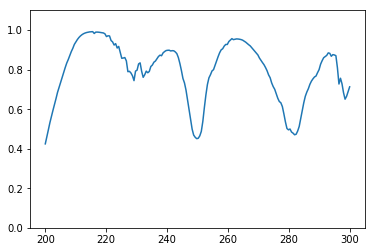

Test 141
True spectrum: 


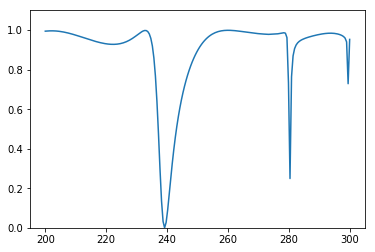

Predicted spectrum: 


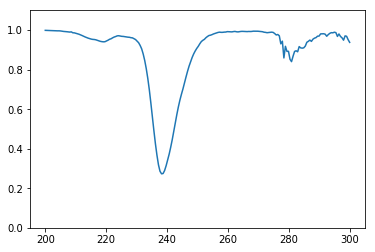

Test 142
True spectrum: 


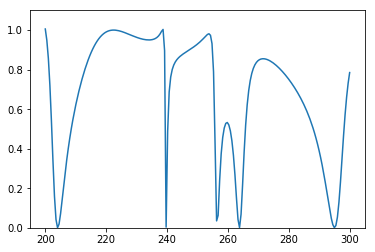

Predicted spectrum: 


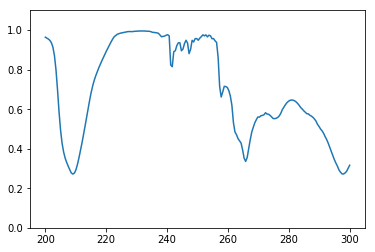

Test 143
True spectrum: 


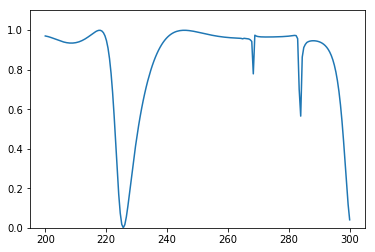

Predicted spectrum: 


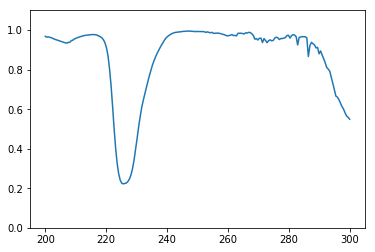

Test 144
True spectrum: 


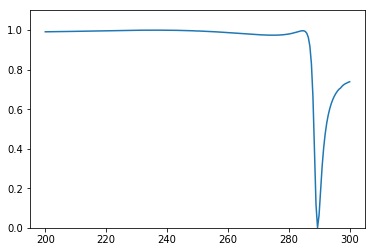

Predicted spectrum: 


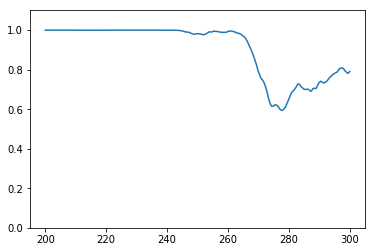

Test 145
True spectrum: 


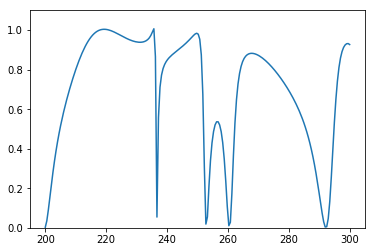

Predicted spectrum: 


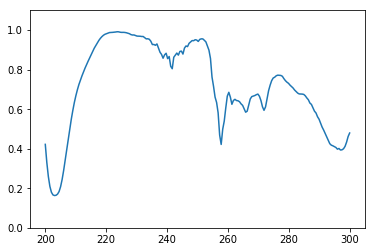

Test 146
True spectrum: 


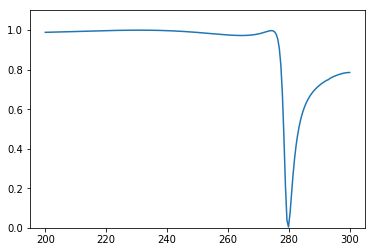

Predicted spectrum: 


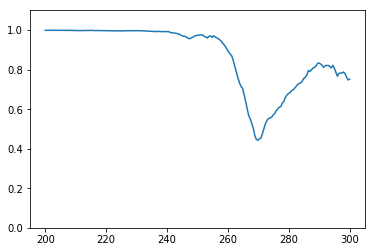

Test 147
True spectrum: 


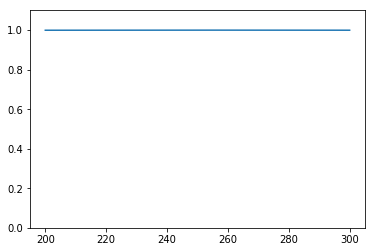

Predicted spectrum: 


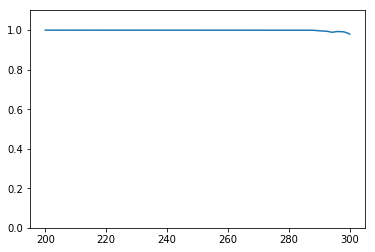

Test 148
True spectrum: 


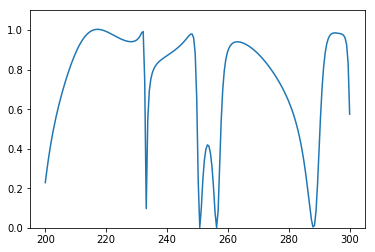

Predicted spectrum: 


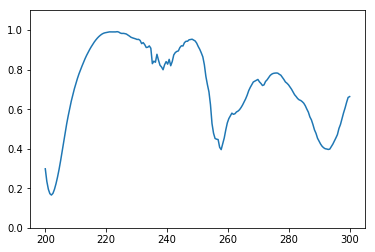

Test 149
True spectrum: 


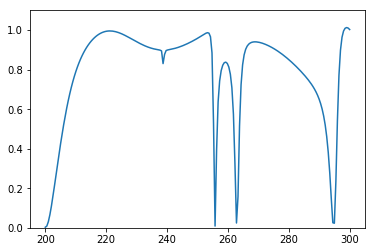

Predicted spectrum: 


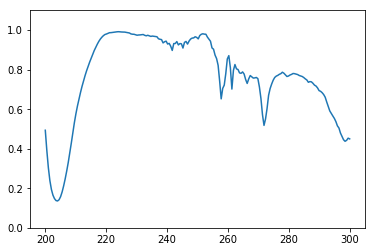

Test 150
True spectrum: 


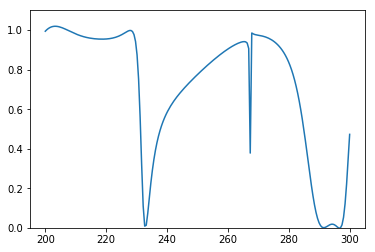

Predicted spectrum: 


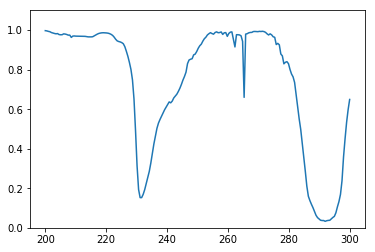

Test 151
True spectrum: 


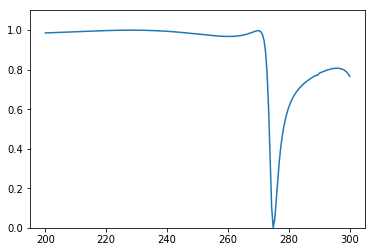

Predicted spectrum: 


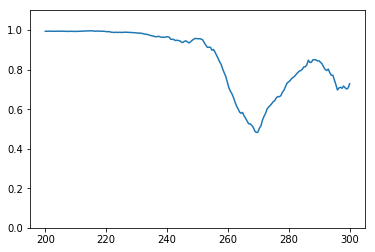

Test 152
True spectrum: 


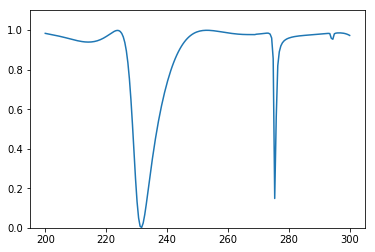

Predicted spectrum: 


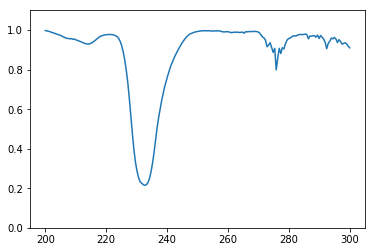

Test 153
True spectrum: 


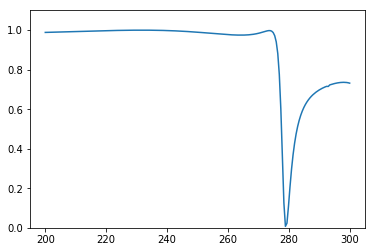

Predicted spectrum: 


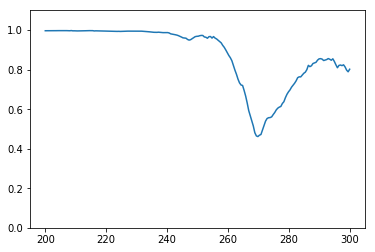

Test 154
True spectrum: 


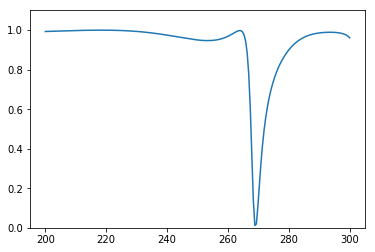

Predicted spectrum: 


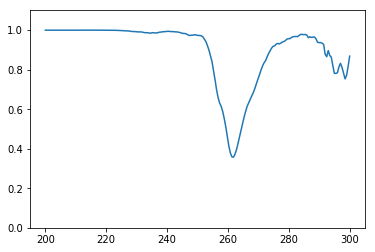

Test 155
True spectrum: 


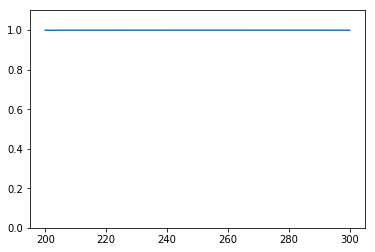

Predicted spectrum: 


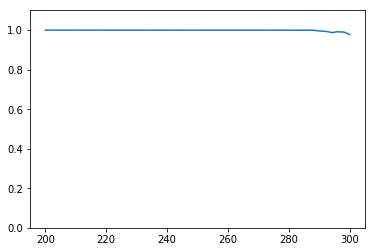

Test 156
True spectrum: 


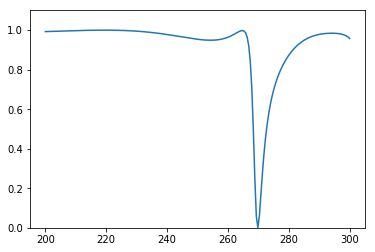

Predicted spectrum: 


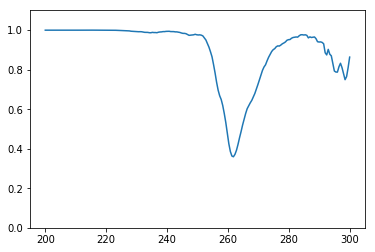

Test 157
True spectrum: 


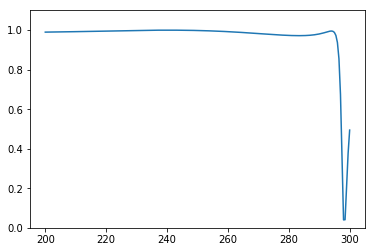

Predicted spectrum: 


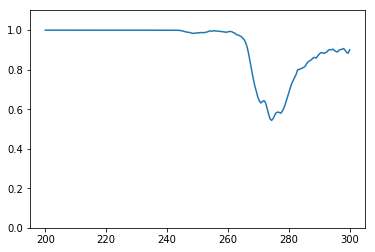

Test 158
True spectrum: 


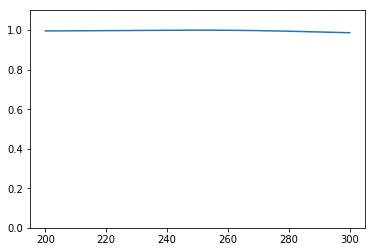

Predicted spectrum: 


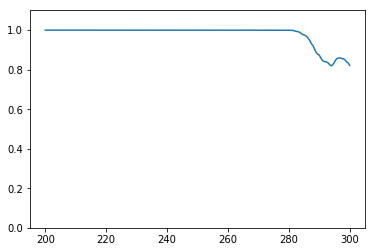

Test 159
True spectrum: 


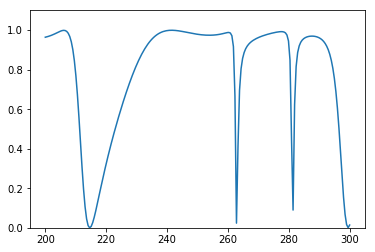

Predicted spectrum: 


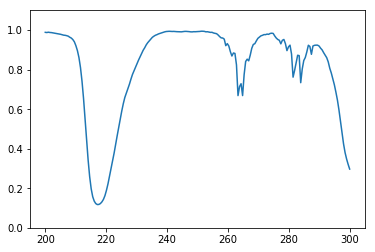

Test 160
True spectrum: 


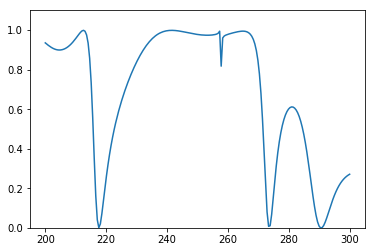

Predicted spectrum: 


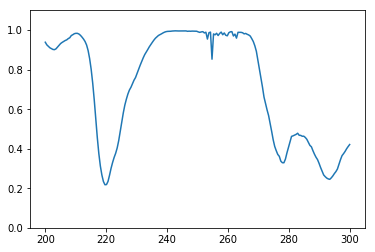

Test 161
True spectrum: 


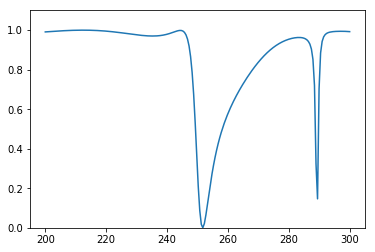

Predicted spectrum: 


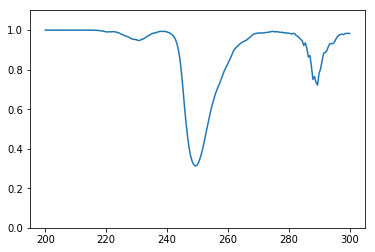

Test 162
True spectrum: 


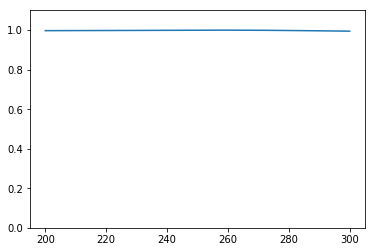

Predicted spectrum: 


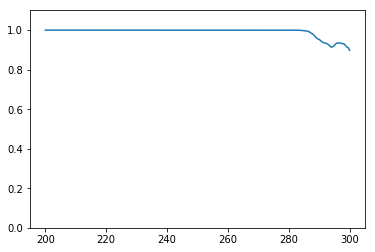

Test 163
True spectrum: 


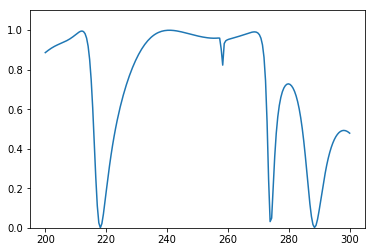

Predicted spectrum: 


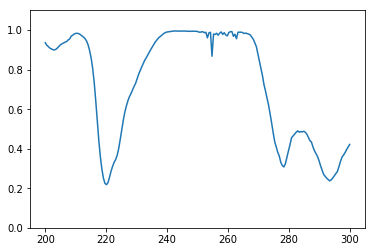

Test 164
True spectrum: 


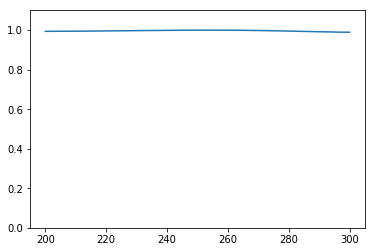

Predicted spectrum: 


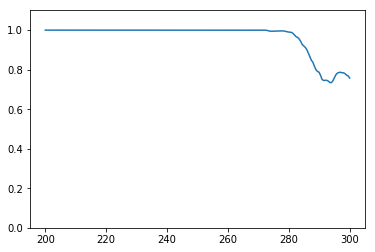

Test 165
True spectrum: 


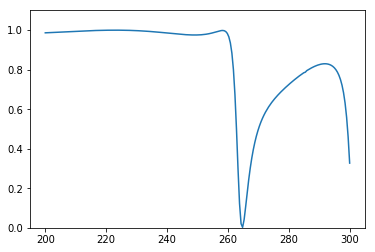

Predicted spectrum: 


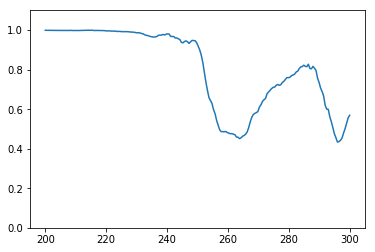

Test 166
True spectrum: 


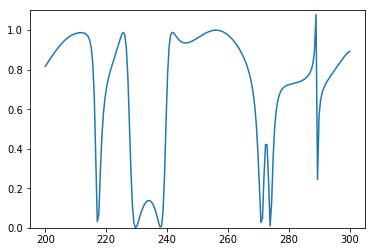

Predicted spectrum: 


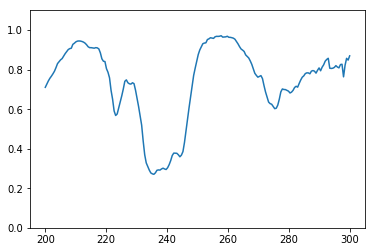

Test 167
True spectrum: 


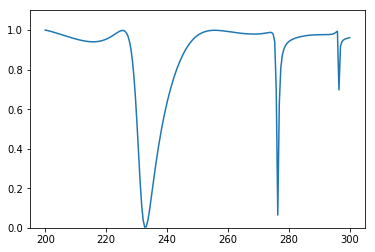

Predicted spectrum: 


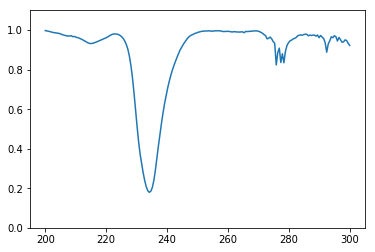

Test 168
True spectrum: 


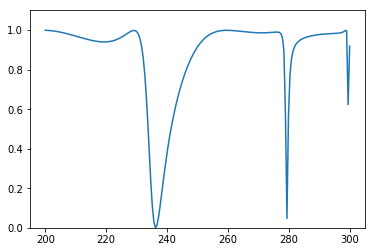

Predicted spectrum: 


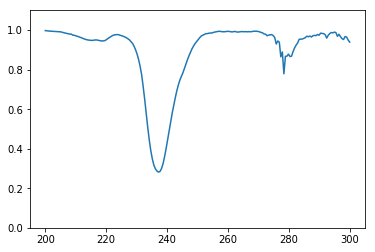

Test 169
True spectrum: 


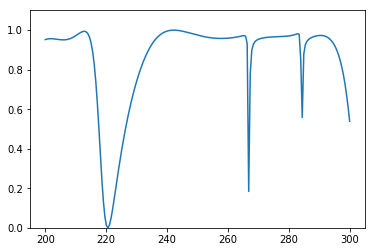

Predicted spectrum: 


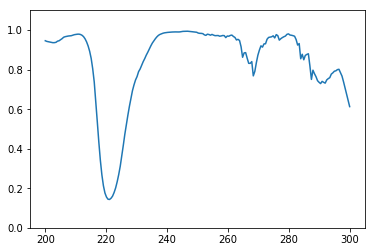

Test 170
True spectrum: 


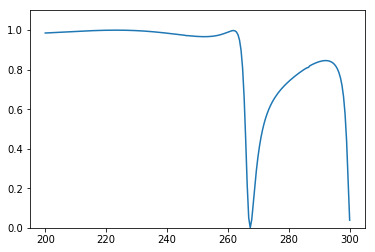

Predicted spectrum: 


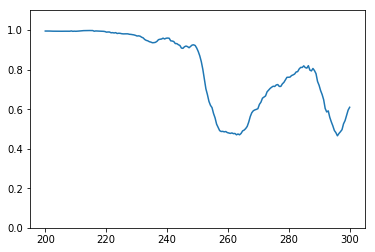

Test 171
True spectrum: 


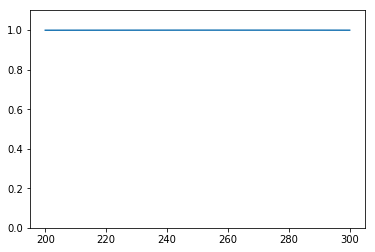

Predicted spectrum: 


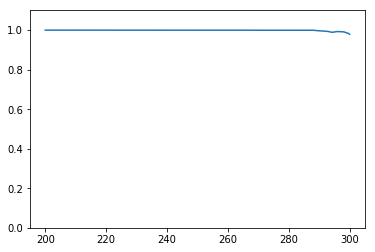

Test 172
True spectrum: 


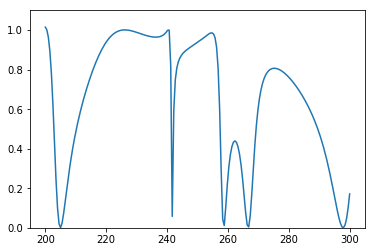

Predicted spectrum: 


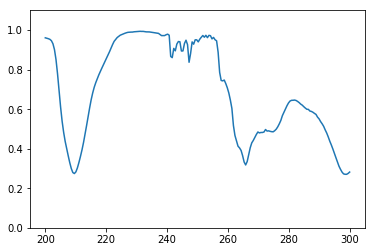

Test 173
True spectrum: 


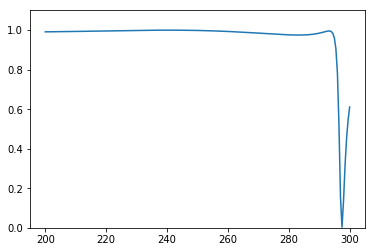

Predicted spectrum: 


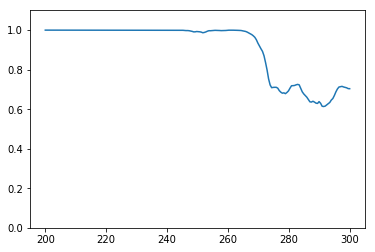

Test 174
True spectrum: 


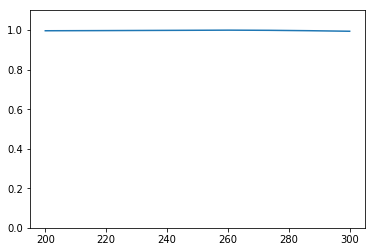

Predicted spectrum: 


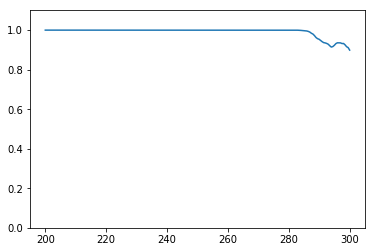

Test 175
True spectrum: 


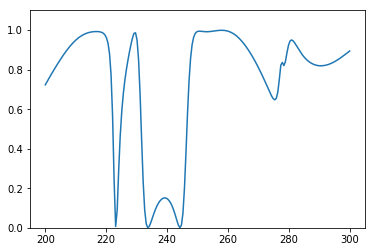

Predicted spectrum: 


KeyboardInterrupt: 

In [30]:
x = np.genfromtxt('meep_code/data/SP_xaxis.txt')
for i in range(len(test_X)):
    print('Test '+str(i))
    print('True spectrum: ')
    plt.ylim(0, 1.1)
    plt.plot(x, test_Y[i])
    plt.show()
    print('Predicted spectrum: ')
    plt.ylim(0, 1.1)
    plt.plot(x, np.reshape(model.predict(np.reshape(test_X[i], (1, 6))), (200,)))
    plt.show()